##**Uvod**

U sve konkurentnijoj kozmetiƒçkoj industriji, razumijevanje sastava proizvoda postaje kljuƒçno kako za proizvoƒëaƒçe, tako i za krajnje korisnike. Potro≈°aƒçi su sve svjesniji sastojaka u proizvodima koje koriste, dok brendovi te≈æe uƒçinkovitijem formuliranju. Stoga je analiza meƒëusobnih odnosa izmeƒëu sastojaka va≈æna za prepoznavanje obrazaca, otkrivanje funkcionalnih grupa i optimizaciju formulacija.

Podaci kori≈°teni u ovom projektu prikupljeni su sa slu≈æbene stranice Sephora, jednog od vodeƒáih globalnih online trgovaca kozmetikom, i javno su objavljeni na platformi Kaggle.

Kori≈°tenje metoda analize mre≈æa (npr. centralnost, detekcija zajednica) i algoritama poput Louvain algoritma omoguƒáuje otkrivanje skrivenih veza i grupiranja sastojaka koja nisu vidljiva u standardnim tabliƒçnim prikazima. Time se stvara dublje razumijevanje funkcionalnih odnosa meƒëu sastojcima, kao i identifikacija kljuƒçnih komponenti unutar mre≈æe proizvoda.

## Podaci

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dominoweir/skincare-product-ingredients")

print("Path to dataset files:", path)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 264k/264k [00:00<00:00, 14.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/dominoweir/skincare-product-ingredients/versions/1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Assuming the dataset is in CSV format, load it into a pandas DataFrame
dataset_file = path + "/cosmetic_p.csv"  # Replace "filename.csv" with the actual file name
df = pd.read_csv(dataset_file)

# Display the DataFrame
df.head()

Label           brand                                           name  \
0  Moisturizer          LA MER                                Cr√®me de la Mer   
1  Moisturizer           SK-II                       Facial Treatment Essence   
2  Moisturizer  DRUNK ELEPHANT                     Protini‚Ñ¢ Polypeptide Cream   
3  Moisturizer          LA MER                    The Moisturizing Soft Cream   
4  Moisturizer    IT COSMETICS  Your Skin But Better‚Ñ¢ CC+‚Ñ¢ Cream with SPF 50+   

   price  rank                                        ingredients  \
0    175   4.1  Algae (Seaweed) Extract, Mineral Oil, Petrolat...   
1    179   4.1  Galactomyces Ferment Filtrate (Pitera), Butyle...   
2     68   4.4  Water, Dicaprylyl Carbonate, Glycerin, Ceteary...   
3    175   3.8  Algae (Seaweed) Extract, Cyclopentasiloxane, P...   
4     38   4.1  Water, Snail Secretion Filtrate, Phenyl Trimet...   

   Combination  Dry  Normal  Oily  Sensitive  
0            1    1       1     1          1  
1            1    1       1     1          1  
2            1    1       1     1          0  
3            1    1       1     1          1  
4            1    1       1     1          1

In [4]:
df.shape

(1472, 11)

In [5]:
df['ingredients']

0       Algae (Seaweed) Extract, Mineral Oil, Petrolat...
1       Galactomyces Ferment Filtrate (Pitera), Butyle...
2       Water, Dicaprylyl Carbonate, Glycerin, Ceteary...
3       Algae (Seaweed) Extract, Cyclopentasiloxane, P...
4       Water, Snail Secretion Filtrate, Phenyl Trimet...
                              ...                        
1467    Water, Alcohol Denat., Potassium Cetyl Phospha...
1468    Water, Isododecane, Dimethicone, Butyloctyl Sa...
1469    Water, Dihydroxyacetone, Glycerin, Sclerocarya...
1470    Water, Dihydroxyacetone, Propylene Glycol, PPG...
1471                        Visit the DERMAFLASH boutique
Name: ingredients, Length: 1472, dtype: object

Oƒçi≈°ƒáeni podaci- skup dobicen ƒçi≈°ƒáenjem dataframe u drugoj bilje≈ænici

In [7]:
with open('Ingredients_set_769.txt', 'r', encoding='utf-8') as f:
    tekst = f.read()

ingredients = eval(tekst)
print(ingredients)


['Sorbitan Sesquiisostearate', 'Albiza Julibrissin Bark Extract', 'Propylene Carbonate', 'Rhus Succedanea Fruit Wax', 'Cladosiphon Okamuranus Extract', 'Cetyl Esters', 'Garcinia Mangostana Peel Extract', 'Polyglyceryl-5 Laurate', 'Boron nitride', 'Thermus Thermophillus Ferment', 'Ledebouriella Seseloides Root Extract', 'Citrus Aurantium Amara (Bitter Orange) Flower Oil', 'Red Clover Extract', 'Hydrolyzed Soy Protein', 'Cinnamomum Camphora (Camphor) Leaf Extract', 'Tsuga Canadensis Oil', 'Gellidiella Acerosa Extract', 'Lithospermum Erythrorhizon Root Extract', 'Dioscorea Villosa (Wild Yam) Root Extract', 'Oleth-3 Phosphate', 'Plantago Lanceolata Leaf Extract', 'Acetylarginyltryptophyl Diphenylglycine', 'Saponaria Officinalis Leaf Extract', 'Palmitic Acid', 'Disodium Lauriminodipropionate Tocopheryl Phosphates', 'sh-Polypeptide-8', 'Citrus Aurantifolia (Lime) Fruit Extract', 'Citrus Aurantifolia (Lime) Oil', 'Butyrospermum Parkii Nut Shell Powder', 'Carya Ovata Bark Extract', 'Ceteareth-

In [8]:
len(ingredients)

769

In [9]:
# prompt: pretovri listu ingredients u set

ingredients_set = set(ingredients)
print(ingredients_set)
len(ingredients_set)
ingredients_set



{'Tetrahexyldecyl Ascorbate', 'Polyglyceryl-6 Ximenia Americana Seedate', 'Ceramide NP', 'C12-15 Alkyl Lactate', 'Disodium Cocoamphodiacetate', 'PEG-6', 'poloxamer', 'Syringa Vulgaris (Lilac) Leaf Cell Culture Extract', 'Ammonium Glycyrrhizate', 'Phe-noxyethanol', 'Buteth-3', 'Polybutylene Glycol/Ppg-9/1 Copolymer', 'Cinnamomum Camphora (Camphor) Bark Oil', 'Camellia Sinensis Seed Oil', 'Paeonia Albiflora (Peony) Root Extract', 'Ulva Lactuca Extract', 'Chromium Hydroxide Green', 'Rosa Damascena Flower Extract', 'Cryptomeria Japonica Leaf Extract', 'Saccharomyces/Viscum Album (Mistletoe) Ferment Extract', 'Cholesteryl Oleyl Carbonate', 'Chlorphenesin', 'Capryloyl Glycine', 'Bifida Ferment Lysate', 'Eucalyptus Globululs Leaf Oil', 'PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether', 'Calcium Stearate', 'Tetrasodium Tetracarboxymethyl Naringeninchalcone', 'Sodium Glycyrrhetinate', 'Acrylates/Vinyl Isodecanoate Crosspolymer', 'Salicornia Herbacea Extract', 'Pentaerythrityl Tetraethylhexan

{'1,2-Hexanediol',
 '3-O-Ethyl Ascorbic Acid',
 '6-Naphthalate',
 'Acacia Farnesiana Flower Wax',
 'Acacia Victoriae Fruit Extract',
 'Acetyl Hexapeptide-8',
 'Acetylarginyltryptophyl Diphenylglycine',
 'Achillea Millefolium Flower Extract',
 'Acrylates /C10-30 Alkyl Acrylate Crosspolymer',
 'Acrylates C10/30 Alkyl Acrylate Crosspolymer',
 'Acrylates/C10-30 Alykyl Acrylate Crosspolymer',
 'Acrylates/Vinyl Isodecanoate Crosspolymer',
 'Aesculus Hippocastanum (Horse Chestnut) Extract',
 'Agarum Cribosum Extract',
 'Agave Tequilana Leaf Extract',
 'Albiza Julibrissin Bark Extract',
 'Alchol Denat',
 'Alcohol',
 'Alcohol Denat',
 'Alcohol denat',
 'Aleurites Moluccana (Kukui) Nut Oil',
 'Algae Extract',
 'Algin',
 'Alkanna Tinctoria Root Extract',
 'Allantoin',
 'Aloe Barbadensis Leaf Extract',
 'Aloe Barbadensis Leaf Juice',
 'Aloe Yohjyu Matsu Ekisu',
 'Alpha Isomethyl Ionone',
 'Alpha Lipoic Acid',
 'Aluminum Hydroxide',
 'Amber Powder',
 'Ammonium Acryloyldimethyltaurate/Vp Copolymer',

## Graf sastojaka

In [10]:
import matplotlib.pyplot as plt
import networkx as nx

#  imate dataframe 'df' i set sastojaka 'ingredients_set'

# Kreirajte graf
graph = nx.Graph()

# Dodaj ƒçvorove za svaki proizvod
products = df['Label'].unique()
graph.add_nodes_from(products, type='product')

# Doda ƒçvorove za svaki sastojak
graph.add_nodes_from(ingredients_set, type='ingredient')

# Pove≈æite proizvode sa sastojcima
for index, row in df.iterrows():
    product_name = row['Label']
    #  sastojci u stupcu 'ingredients' odvojeni zarezom i razmakom
    ingredients = row['ingredients'].split(', ')
    for ingredient in ingredients:
        # Provjera nalazi li se sastojak u proƒçi≈°ƒáenom setu sastojaka
        if ingredient in ingredients_set:
            graph.add_edge(product_name, ingredient)

# Ispis broja ƒçvorova i bridova
print(f"Broj ƒçvorova: {graph.number_of_nodes()}")
print(f"Broj bridova: {graph.number_of_edges()}")

Broj ƒçvorova: 720
Broj bridova: 1707


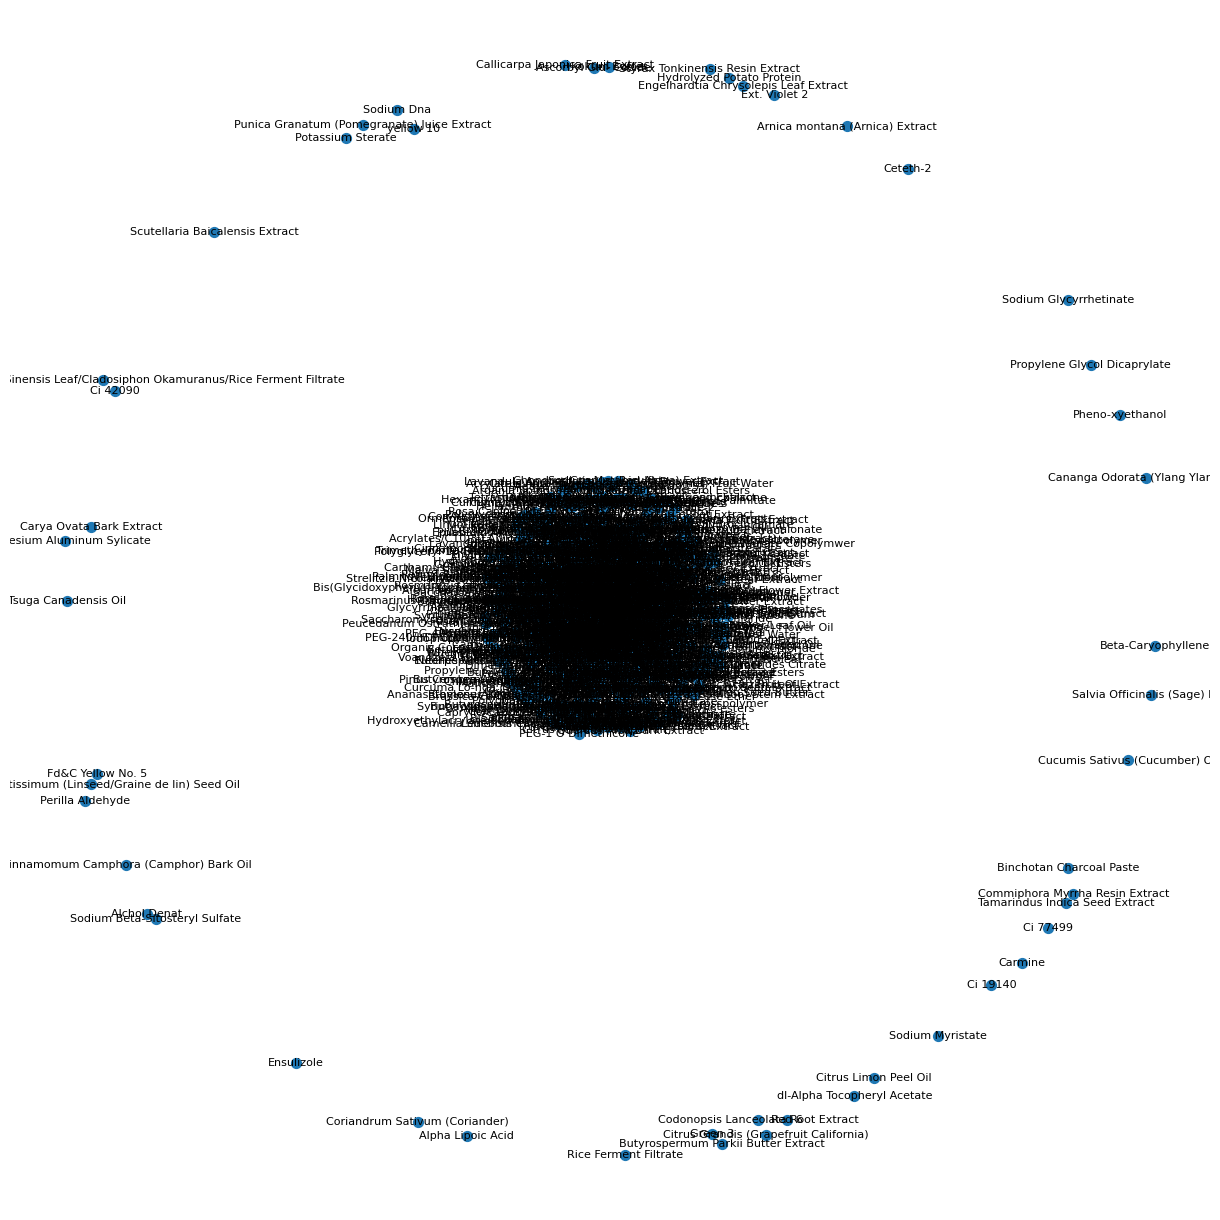

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(graph, k=0.1)  # Manja vrijednost k komprimira graf
nx.draw(graph, pos, with_labels=True, node_size=50, font_size=8)
plt.show()

In [12]:
!pip install plotly kaleido

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 79.9/79.9 MB 12.5 MB/s eta 0:00:00


In [13]:
import plotly.graph_objects as go
import networkx as nx # Pretpostavljamo da je networkx veƒá uvezen i graf kreiran

# Dohvaƒáanje pozicije ƒçvorova
# Osiguraj da je 'graph' objekt NetworkX grafa kreiran s ƒçvorovima iz products i ingredients_set
# na temelju prethodnih koraka
pos = nx.spring_layout(graph, k=0.1)

# Kreiranje liste bridova i ƒçvorova za plotly
edge_x = []
edge_y = []
for edge in graph.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

node_x = []
node_y = []
node_text = []
for node in graph.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

# Kreirajte trag za bridove
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# Kreirajte trag za ƒçvorove
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,
        size=10,
        colorbar=dict(
            thickness=15,
            title='Broj veza',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# Dodaj tekst (labele) ƒçvorovima
node_trace.text = node_text

# Kreiraj figuru
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='<br>Network Graph',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40),
                    annotations=[ dict(
                        text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                        showarrow=False,
                        xref="paper", yref="paper",
                        x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )

# Prikaz figure (u Google Colabu)
fig.show()

In [14]:


# Metrike grafa
# Izraƒçunajte metriku prosjeƒçnog stupnja
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()

# Izraƒçunajte metriku koeficijenta klasteriranja
# Oprez: Za velike grafove ovo mo≈æe potrajati
clustering_coefficient = nx.average_clustering(graph)

# Izraƒçunajte broj povezanih komponenti
num_components = nx.number_connected_components(graph)

# Izraƒçunajte metriku prosjeƒçne duljine puta
# Ovo ima smisla samo za povezane grafove. Ako graf nije povezan, razmotrite komponente zasebno.
# Provjerite je li graf povezan prije izraƒçuna prosjeƒçne duljine puta
average_path_length = 0
if num_components == 1:
    average_path_length = nx.average_shortest_path_length(graph)
else:
    # Ako graf nije povezan, mo≈æete izraƒçunati prosjeƒçnu duljinu puta za svaku komponentu
    # ili postaviti na 0 ili neku drugu prikladnu vrijednost
    average_path_length = float('inf') # Ili npr. 0, ovisno o tome kako ≈æelite prikazati metriku

# Izraƒçunajte toƒçke artikulacije (mostovi)
articulation_points = list(nx.articulation_points(graph))
num_articulation_points = len(articulation_points)

# Izraƒçunajte mostove
bridges = list(nx.bridges(graph))
num_bridges = len(bridges)

# Pohranite metriku u rjeƒçnik
graph_metrics = {
    'Average Degree': average_degree,
    'Clustering Coefficient': clustering_coefficient,
    'Number of Components': num_components,
    'Average Path Length': average_path_length,
    'Articulation Points': num_articulation_points,
    'Bridges': num_bridges
}

# Ispi≈°ite metriku
print("Metrike grafa:")
for metric, value in graph_metrics.items():
    print(f"{metric}: {value}")

Metrike grafa:
Average Degree: 4.741666666666666
Clustering Coefficient: 0.0
Number of Components: 51
Average Path Length: inf
Articulation Points: 6
Bridges: 316


In [15]:
# Calculate structural metrics
average_degree = sum(dict(graph.degree()).values()) / graph.number_of_nodes()
# Koristimo graph, a ne graph_lcc, za clustering koeficijent cijelog grafa
clustering_coefficient = nx.average_clustering(graph)
transitivity = nx.transitivity(graph)
density = nx.density(graph)


# Calculate path-based metrics
# Ovo ima smisla samo za povezane grafove. Ako graf nije povezan, razmotrite komponente zasebno.
average_path_length = 0
diameter = 0
if nx.is_connected(graph):
    average_path_length = nx.average_shortest_path_length(graph)
    # Promijeni na graph umjesto G_er_lcc ako ≈æeli≈° dijametar cijelog grafa
    diameter = nx.diameter(graph)
else:
    # Ako graf nije povezan, izraƒçunajte metriku za najveƒáu povezanu komponentu (LCC)
    print("Graf nije povezan. Raƒçunam average path length i diameter samo za najveƒáu povezanu komponentu.")
    # Pronaƒëi najveƒáu povezanu komponentu
    largest_cc = max(nx.connected_components(graph), key=len)
    G_lcc = graph.subgraph(largest_cc)
    # Provjeri je li LCC uopƒáe povezana (trebala bi biti po definiciji) i ima li vi≈°e od 1 ƒçvora
    if G_lcc.number_of_nodes() > 1:
        average_path_length = nx.average_shortest_path_length(G_lcc)
        diameter = nx.diameter(G_lcc)
    else:
        # Ako je LCC veliƒçine 1, path length i diameter su nedefinirani
        average_path_length = float('nan') # Not a Number
        diameter = float('nan') # Not a Number


# Pohranite metriku u rjeƒçnik
graph_metrics = {
    'Average Degree': average_degree,
    'Average Clustering Coefficient': clustering_coefficient,
    'Transitivity': transitivity,
    'Density': density,
    'Average Path Length (LCC if not connected)': average_path_length,
    'Diameter (LCC if not connected)': diameter,
    'Number of Components': nx.number_connected_components(graph), # Ponovno izraƒçunaj za svaki sluƒçaj
    'Articulation Points': len(list(nx.articulation_points(graph))),
    'Bridges': len(list(nx.bridges(graph)))
}

# Ispi≈°ite metriku
print("Metrike grafa:")
for metric, value in graph_metrics.items():
    print(f"{metric}: {value}")

Graf nije povezan. Raƒçunam average path length i diameter samo za najveƒáu povezanu komponentu.
Metrike grafa:
Average Degree: 4.741666666666666
Average Clustering Coefficient: 0.0
Transitivity: 0
Density: 0.0065948076031525265
Average Path Length (LCC if not connected): 2.7142493808982
Diameter (LCC if not connected): 4
Number of Components: 51
Articulation Points: 6
Bridges: 316


*   **Zakljuƒçak o Metrikama Grafa:**
    *   **Broj ƒçvorova i bridova:** (Ove informacije nisu direktno navedene, ali su osnova za ostale metrike. Pretpostavlja se da graf ima dovoljan broj ƒçvorova i bridova za smislenu analizu.)
    *   **Average Degree (Prosjeƒçni stupanj): 4.74**
        *   Svaki ƒçvor (proizvod ili sastojak) je u prosjeku povezan s otprilike 4.74 drugih ƒçvorova.
        *   Ovo daje osnovnu ideju o povezanosti u mre≈æi ‚Äì ƒçvorovi nisu izolirani, ali prosjeƒçan broj veza nije iznimno visok.
    *   Clustering Coefficient (Koeficijent klasteriranja): 0.0 i Transitivity (Tranzitivnost): 0
        *   Ovo je vrlo znaƒçajno: Vrijednost 0.0 za oba ukazuje da u grafu nema trokuta.
        *   U kontekstu ovog bifartitnog grafa (proizvodi povezani sa sastojcima), to znaƒçi da niti dva proizvoda ne dijele *isti par* sastojaka, niti dva sastojka ne nalaze se u *istom paru* proizvoda koji su meƒëusobno povezani na neki drugi naƒçin u grafu.
        *   Ovo potvrƒëuje da graf striktno prikazuje povezanost proizvoda sa sastojcima, a ne izravnu povezanost izmeƒëu proizvoda ili sastojaka (osim ako su sastojci povezani jer se nalaze u istom proizvodu, ili proizvodi povezani jer sadr≈æe isti sastojak).
    *   **Density (Gustoƒáa): 0.0066**
        *   Gustoƒáa je niska, ≈°to znaƒçi da stvarni broj bridova ƒçini vrlo mali postotak od maksimalno moguƒáeg broja bridova u grafu te veliƒçine.
        *   Ovo ukazuje na rijetku mre≈æu, ≈°to je oƒçekivano za ovakav tip podataka (svaki proizvod koristi samo podskup svih moguƒáih sastojaka).
    *   **Number of Components (Broj komponenti): 51**
        *   Graf nije povezan, veƒá se sastoji od 51 zasebne, nepovezane komponente.
        *   Ovo znaƒçi da postoji 51 grupe proizvoda/sastojaka izmeƒëu kojih ne postoji nikakva veza kroz dijeljene sastojke.
        *   Velika povezana komponenta vjerojatno sadr≈æi veƒáinu proizvoda i uobiƒçajenih sastojaka, dok manje komponente mogu predstavljati vrlo specifiƒçne proizvode s jedinstvenim sastojcima koji se ne nalaze nigdje drugdje u skupu podataka.

    *   **Diameter (LCC if not connected): 4**
        *   Ove metrike su izraƒçunate samo za najveƒáu povezanu komponentu jer cijeli graf nije povezan.
        *   Prosjeƒçna duljina puta od ~2.7 ukazuje da je, unutar najveƒáe povezane komponente, prosjeƒçna "udaljenost" izmeƒëu bilo koja dva ƒçvora (proizvoda ili sastojka) relativno mala. To znaƒçi da su proizvodi i sastojci unutar te komponente priliƒçno blisko povezani.
        *   Promjer od 4 znaƒçi da je najdu≈æi najkraƒái put izmeƒëu bilo koja dva ƒçvora u najveƒáoj povezanoj komponenti 4 koraka. Ovo dodatno nagla≈°ava "small-world" prirodu (kratki putevi) *unutar* te komponente.

    *   **Bridges (Mostovi): 316**
        *   Toƒçke artikulacije i mostovi su ƒçvorovi/bridovi ƒçijim bi uklanjanjem do≈°lo do raspada grafa na vi≈°e komponenti.
        *   Prisutnost 6 toƒçaka artikulacije znaƒçi da postoji 6 kljuƒçnih ƒçvorova (vjerojatno sastojaka ili proizvoda) koji dr≈æe dijelove mre≈æe zajedno unutar komponenti.
        *   Veliki broj mostova (316) ukazuje na to da postoji mnogo pojedinaƒçnih veza ƒçije uklanjanje bi izoliralo dijelove grafa. To sugerira da su mnogi dijelovi mre≈æe povezani samo kroz jednu "vezu" (jedan zajedniƒçki sastojak izmeƒëu dva proizvoda, ili jedan proizvod koji sadr≈æi dva specifiƒçna sastojka).



## ER model-graf sastojaka i podjela na zajednice

In [16]:
n = graph.number_of_nodes()
m = graph.number_of_edges()
p = 2 * m / (n * (n - 1))  # procjena vjerojatnosti ruba
G_er = nx.erdos_renyi_graph(n, p)


In [17]:
print(n)

720


In [18]:
real_avg_clustering = nx.average_clustering(graph)
er_avg_clustering = nx.average_clustering(G_er)


In [19]:
largest_cc = max(nx.connected_components(G_er), key=len)
G_er_lcc = G_er.subgraph(largest_cc)

er_avg_path = nx.average_shortest_path_length(G_er_lcc)
print("Prosjeƒçna duljina puta za najveƒái povezani komponent ER grafa:", er_avg_path)


Prosjeƒçna duljina puta za najveƒái povezani komponent ER grafa: 4.374437327378504


In [20]:
if nx.is_connected(G_er):
    er_avg_path = nx.average_shortest_path_length(G_er)
else:
    print("ER graf nije povezan, raƒçunam samo za najveƒáu povezanu komponentu.")
    largest_cc = max(nx.connected_components(G_er), key=len)
    G_er_lcc = G_er.subgraph(largest_cc)
    er_avg_path = nx.average_shortest_path_length(G_er_lcc)


ER graf nije povezan, raƒçunam samo za najveƒáu povezanu komponentu.


In [21]:
n = graph.number_of_nodes()
m = graph.number_of_edges()

# vjerojatnost povezivanja u ER modelu
p = 2 * m / (n * (n - 1))
print(f"Broj ƒçvorova: {n}, broj bridova: {m}, vjerojatnost p: {p:.4f}")


Broj ƒçvorova: 720, broj bridova: 1707, vjerojatnost p: 0.0066


In [22]:
G_er = nx.erdos_renyi_graph(n, p)


In [23]:
def get_lcc_subgraph(G):
    largest_cc = max(nx.connected_components(G), key=len)
    return G.subgraph(largest_cc)

# Stvarni graf - najveƒáa komponenta
graph_lcc = get_lcc_subgraph(graph)
real_avg_path = nx.average_shortest_path_length(graph_lcc)
real_clustering = nx.average_clustering(graph)
print(f"Stvarni graf - prosjeƒçna duljina puta (LCC): {real_avg_path:.4f}")
print(f"Stvarni graf - prosjeƒçni clustering koeficijent: {real_clustering:.4f}")

# ER graf - najveƒáa komponenta
G_er_lcc = get_lcc_subgraph(G_er)
er_avg_path = nx.average_shortest_path_length(G_er_lcc)
er_clustering = nx.average_clustering(G_er)
print(f"ER graf - prosjeƒçna duljina puta (LCC): {er_avg_path:.4f}")
print(f"ER graf - prosjeƒçni clustering koeficijent: {er_clustering:.4f}")


Stvarni graf - prosjeƒçna duljina puta (LCC): 2.7142
Stvarni graf - prosjeƒçni clustering koeficijent: 0.0000
ER graf - prosjeƒçna duljina puta (LCC): 4.3684
ER graf - prosjeƒçni clustering koeficijent: 0.0035


In [24]:
import plotly.graph_objects as go
import networkx as nx

def plot_graph_plotly(G, title="Network Graph"):
    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_text = []
    node_color = []

    # Mo≈æe≈° bojati ƒçvorove prema stupnju (broju veza)
    degrees = dict(G.degree())
    max_degree = max(degrees.values()) if degrees else 1

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"{node} (degree: {degrees[node]})")
        # Normaliziramo stupnjeve za boju
        node_color.append(degrees[node] / max_degree)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Viridis',
            color=node_color,
            size=10,
            colorbar=dict(
                thickness=15,
                title='Degree',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Network Visualization with Plotly",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()

# Prikaz stvarnog grafa - najveƒáe povezane komponente
plot_graph_plotly(graph_lcc, title="Stvarni graf - Najveƒáa povezana komponenta")

# Prikaz ER grafa - najveƒáe povezane komponente
plot_graph_plotly(G_er_lcc, title="ER graf - Najveƒáa povezana komponenta")


In [25]:
ingredient_graph = nx.Graph()
# dodavanje veza izmeƒëu sastojaka unutar istih proizvoda
for _, row in df.iterrows():
    ingredients = row['ingredients'].split(', ')
    for i in range(len(ingredients)):
        for j in range(i + 1, len(ingredients)):
            ingredient_graph.add_edge(ingredients[i], ingredients[j])


In [26]:
def plot_graph_plotly_highlight_lcc(G, title="Network Graph"):
    import plotly.graph_objects as go
    import networkx as nx

    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

    node_x = []
    node_y = []
    node_text = []
    node_color = []

    degrees = dict(G.degree())
    max_degree = max(degrees.values()) if degrees else 1

    # ‚ûï Najveƒáa povezana komponenta
    lcc_nodes = set(max(nx.connected_components(G), key=len))

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(f"{node} (degree: {degrees[node]})")

        if node in lcc_nodes:
            node_color.append('red')  # üî¥ istaknuto
        else:
            node_color.append('lightgrey')  # üü™ ostali ƒçvorovi u sivoj

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color=node_color,
            size=8,
            line_width=1),
        text=node_text)

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[ dict(
                            text="Crveno = najveƒáa povezana komponenta",
                            showarrow=False,
                            xref="paper", yref="paper",
                            x=0.005, y=-0.002 ) ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()


**≈†to ovo znaƒçi u kontekstu kozmetike?**

Manja prosjeƒçna udaljenost:

Sastojci koji se ƒçesto koriste u proizvodima povezani su preko relativno malog broja "posrednika", ≈°to znaƒçi da se u kozmetiƒçkoj industriji ƒçesto koristi odreƒëeni skup sastojaka u razliƒçitim kombinacijama. To mo≈æe biti korisno za pronala≈æenje sliƒçnih proizvoda ili identificiranje kljuƒçnih sastojaka.

Nizak clustering koeficijent:

Kozmetiƒçki proizvodi ne koriste sastojke u vrlo zatvorenim "klasterima" od tri ili vi≈°e meƒëusobno povezanih sastojaka. Mo≈æda se kombinacije oslanjaju na specifiƒçne funkcionalnosti koje nisu nu≈æno meƒëusobno povezane u trojke.



In [27]:
# Dobivanje svih povezanih komponenti
connected_components = list(nx.connected_components(graph))

# Broj povezanih komponenti
num_components = len(connected_components)

# Najveƒáa komponenta (skup ƒçvorova)
largest_component = max(connected_components, key=len)

# Veliƒçina najveƒáe komponente
size_largest_component = len(largest_component)

print(f"Broj povezanih komponenti: {num_components}")
print(f"Veliƒçina najveƒáe povezane komponente: {size_largest_component}")

# Import best_partition directly from the community_louvain submodule
from community import community_louvain

# Izraƒçun zajednica (dijeljenje grafa na zajednice)
partition = community_louvain.best_partition(graph)

# Broj zajednica
num_communities = len(set(partition.values()))

print(f"Broj zajednica u mre≈æi: {num_communities}")

# Modularnost zajednica
modularity = community_louvain.modularity(partition, graph)
print(f"Modularnost zajednica: {modularity}")

Broj povezanih komponenti: 51
Veliƒçina najveƒáe povezane komponente: 670
Broj zajednica u mre≈æi: 56
Modularnost zajednica: 0.22231951621377774


Imamo jedan veliki "glavni" skup sastojaka koji su meƒëusobno povezani (najveƒáa komponenta).

Postoji 51 takvih zasebnih komponenti (malo manjih "otoka" sastojaka).

Unutar mre≈æe postoje zajednice sastojaka koji se ƒçesto kombiniraju, ali ne previ≈°e ƒçvrsto (modularnost 0.22), ≈°to znaƒçi da su recepture raznolike i sastojci se ƒçesto mije≈°aju u razliƒçitim kombinacijama.

In [28]:
import networkx as nx
import plotly.graph_objects as go
# import community as community_louvain  # iz python-louvain paketa
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Import best_partition directly from the community_louvain submodule
from community import community_louvain # KEEP THIS LINE

# Iz najveƒáe komponente napravi podgraf
largest_cc = max(nx.connected_components(graph), key=len)
G_lcc = graph.subgraph(largest_cc).copy()

# Pronaƒëi zajednice Louvain metodom
partition = community_louvain.best_partition(G_lcc)

# Dobij sve zajednice kao skupove ƒçvorova
communities = {}
for node, comm_id in partition.items():
    communities.setdefault(comm_id, []).append(node)

# Odredi pozicije ƒçvorova
pos = nx.spring_layout(G_lcc, seed=42)

# Priprema za boje: koliko zajednica, toliko boja
num_communities = len(set(partition.values()))
# Koristimo 'tab20' colormap, ali provjeri ima li dovoljno diskretnih boja ako je num_communities > 20
if num_communities > 20:
    colors = cm.get_cmap('tab20c', num_communities) # tab20c ima vi≈°e boja
else:
    colors = cm.get_cmap('tab20', num_communities)


# Pripremi podatke za plotly
edge_x = []
edge_y = []
for edge in G_lcc.edges():
    if edge[0] in pos and edge[1] in pos: # Dodatna provjera ako pos nije za sve ƒçvorove (rijetko, ali za sigurnost)
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines',
    showlegend=False # Ne ≈æelimo legendu za bridove
)

# Lista za spremanje tragova za svaku zajednicu
community_traces = []

# Kreirajte trag za svaku zajednicu
# Sortiramo po community_id-u radi konzistentnosti
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]

    node_x = []
    node_y = []
    node_text = []

    for node in nodes_in_community:
        if node in pos: # Provjera postojanja u pos
            x, y = pos[node]
            node_x.append(x)
            node_y.append(y)
            node_text.append(node)

    # Boja za ovu zajednicu
    color = mcolors.rgb2hex(colors(comm_id % num_communities)) # Koristi modulo ako community_id nisu sekvencijalni od 0

    # Kreirajte Scatter trag za ovu zajednicu
    trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            color=color,
            size=8,
            line_width=1
        ),
        text=node_text,
        name=f'Zajednica {comm_id}' # Ime za legendu
    )
    community_traces.append(trace)

# Dodajte edge_trace na poƒçetak liste tragova da bude u pozadini
data_traces = [edge_trace] + community_traces


fig = go.Figure(data=data_traces,
                layout=go.Layout(
                    title='<br>Zajednice sastojaka (Louvain)',
                    titlefont_size=16,
                    showlegend=True, # Postavi na True da prika≈æe legendu
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=40, pad=10), # Poveƒáaj margin-right ako legenda zauzima puno mjesta
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
                )
)

fig.show()

<ipython-input-28-470893403>:31: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



In [30]:
# --- Ispis sastojaka po zajednici ---
print("\n--- Sastojci po zajednici ---")
# Sortiraj zajednice po ID-u radi lak≈°eg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(nodes_in_community)}):")
    # Ispis prvih 20 sastojaka radi preglednosti, ako ih ima vi≈°e
    if len(nodes_in_community) > 20:
        print(", ".join(nodes_in_community[1:20]) + ", ...")
    else:
        print(", ".join(nodes_in_community))

print("\n--- Kraj ispisa sastojaka po zajednici ---")


--- Sastojci po zajednici ---

Zajednica 0 (Broj sastojaka: 110):
Polyglyceryl-6 Ximenia Americana Seedate, Phe-noxyethanol, Paeonia Albiflora (Peony) Root Extract, Ulva Lactuca Extract, Cholesteryl Oleyl Carbonate, PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether, Tetrasodium Tetracarboxymethyl Naringeninchalcone, Pikea Robusta Extract, Myristic Acid, CitricAcid, Caprylic/Capric Triglycerides, Rosa Rubiginosa (Rosehip) Seed Oil, Nigella Sativa (Black Cumin) Seed Oil, Vaccinium Macrocarpon (Cran- berry) Seed Oil, Pinus Sylvestris Leaf Oil, Punica Granatum (Pomegranate) Extract, Cetearyl Alco-Hol, Dimethicone/Phenyl Vinyl Dimethicone Crosspolymer, Aloe Barbadensis Leaf Juice, ...

Zajednica 1 (Broj sastojaka: 114):
Tetrahexyldecyl Ascorbate, C12-15 Alkyl Lactate, Disodium Cocoamphodiacetate, Syringa Vulgaris (Lilac) Leaf Cell Culture Extract, Capryloyl Glycine, Bifida Ferment Lysate, Eucalyptus Globululs Leaf Oil, Olive Oil Polyglyceryl-6 esters, Ceramide Np, Glyceryl Linolenate, Sod

In [31]:

# --- Ispis sastojaka po zajednici ---
print("\n--- Sastojci po zajednici ---")
# Sortiraj zajednice po ID-u radi lak≈°eg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(nodes_in_community)}):")
    # Ispis svakog sastojka jedan ispod drugog
    for ingredient in nodes_in_community:
      print(ingredient)

print("\n--- Kraj ispisa sastojaka po zajednici ---")



--- Sastojci po zajednici ---

Zajednica 0 (Broj sastojaka: 110):
Moisturizer
Polyglyceryl-6 Ximenia Americana Seedate
Phe-noxyethanol
Paeonia Albiflora (Peony) Root Extract
Ulva Lactuca Extract
Cholesteryl Oleyl Carbonate
PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether
Tetrasodium Tetracarboxymethyl Naringeninchalcone
Pikea Robusta Extract
Myristic Acid
CitricAcid
Caprylic/Capric Triglycerides
Rosa Rubiginosa (Rosehip) Seed Oil
Nigella Sativa (Black Cumin) Seed Oil
Vaccinium Macrocarpon (Cran- berry) Seed Oil
Pinus Sylvestris Leaf Oil
Punica Granatum (Pomegranate) Extract
Cetearyl Alco-Hol
Dimethicone/Phenyl Vinyl Dimethicone Crosspolymer
Aloe Barbadensis Leaf Juice
Ormenis Multicaulis (Chamomile) Flower Oil
Polyglyceryl-2 Sesquicaprylate
Strelitzia Nicolai (Bird of Paradise flower) Seed Aril Extract
Hydrogenated Phosphatidylcholine
Peg/Ppg-20/15 Dimethicone
Red 33
Octyl Methoxycinnamate
Lagerstroemia Indica Flower Extract
Vitis Vinifera Seed Extract / Grape Seed Extract
Cyperus E

In [32]:

# Pronala≈æenje overlapping sastojaka izmeƒëu zajednica
print("\n--- Overlapping sastojci izmeƒëu zajednica ---")

# Rjeƒçnik za pohranu sastojaka i zajednica kojima pripadaju
ingredient_to_communities = {}
for comm_id, nodes in communities.items():
    for node in nodes:
        if node in ingredient_to_communities:
            ingredient_to_communities[node].add(comm_id)
        else:
            ingredient_to_communities[node] = {comm_id}

# Filtriraj sastojke koji pripadaju u vi≈°e od jedne zajednice
overlapping_ingredients = {
    ingredient: comm_ids
    for ingredient, comm_ids in ingredient_to_communities.items()
    if len(comm_ids) > 1
}

if overlapping_ingredients:
    print("Sastojci koji se pojavljuju u vi≈°e zajednica:")
    for ingredient, comm_ids in overlapping_ingredients.items():
        print(f"- '{ingredient}' se nalazi u zajednicama: {list(comm_ids)}")
else:
    print("Nema sastojaka koji se pojavljuju u vi≈°e od jedne zajednice Louvain detekcije.")

print("\n--- Kraj ispisa overlappajuƒáih sastojaka ---")



--- Overlapping sastojci izmeƒëu zajednica ---
Nema sastojaka koji se pojavljuju u vi≈°e od jedne zajednice Louvain detekcije.

--- Kraj ispisa overlappajuƒáih sastojaka ---


*   **Zajednica 0:**
    *   Sadr≈æi sastojke poput Cetearyl Alcohol, Tamarindus Indica Seed Gum, Curcuma Longa Extract, itd.
    *   Ovi sastojci se ƒçesto nalaze u hidratantnim kremama.
    *   Zakljuƒçak: Ovo je formulacijski klaster hidratantnih ili umirujuƒáih tvari.
*   **Zajednica 1:**
    *   Ukljuƒçuje Witch Hazel, Gossypium Extract, Argan Extract, itd.
    *   Tipiƒçni za ƒçistaƒçe ko≈æe, s blagim adstrigentnim ili pjenastim svojstvima.
    *   Zakljuƒçak: Ovo je ƒçistaƒçko-pjenu≈°avi klaster.
*   **Zajednica 2:**
    *   Tu se nalaze Koenzim A, Rosa Rubiginosa, Vitamin E, Avena Sativa, itd.
    *   To su aktivni sastojci koji se koriste za obnavljanje ko≈æe, protiv starenja, sl.
    *   Zakljuƒçak: Klaster anti-aging/obnavljajuƒáih tretmana.
*   **Zajednica 3:**
    *   Sadr≈æi Pullulan, Chlorophyll, Royal Jelly Extract, itd.
    *   Ovi sastojci su ƒçesti u maskama koje ciljaju revitalizaciju, ƒçistoƒáu.
    *   Zakljuƒçak: Maska-klaster s biljnim i vitaminskim ekstraktima.
*   **Zajednica 4:**
    *   Ukljuƒçuje Horse Chestnut Extract, Peptidi, Silica, itd.
    *   Delikatni, antioksidativni, ƒçesto kori≈°teni u okolooƒçnim proizvodima.
    *   Zakljuƒçak: Klaster za njegu podruƒçja oko oƒçiju.
*   **Zajednica 5:**
    *   Sadr≈æi Ascorbate derivat, Pomegranate Extract, Panthenol, itd.
    *   Sastojci s antioksidativnim, UV-za≈°titnim i umirujuƒáim funkcijama.

###**Najva≈æniji sastojci-metrike**

In [33]:

# Dohvaƒáanje stupnja centralnosti za sve ƒçvorove
degree_centrality = dict(graph.degree())

# Filtriranje samo sastojaka
ingredient_degrees = {node: degree for node, degree in degree_centrality.items() if graph.nodes[node].get('type') == 'ingredient'}

# Sortiranje sastojaka po stupnju centralnosti u silaznom redoslijedu
sorted_ingredients_by_degree = sorted(ingredient_degrees.items(), key=lambda item: item[1], reverse=True)

# Ispis sastojaka s najveƒáom stupnjem centralnosti (npr. top 10)
print("Top 10 sastojaka po stupnju centralnosti:")
for ingredient, degree in sorted_ingredients_by_degree:
  if degree==6:
    print(f"- '{ingredient}' ({degree} veza)")


Top 10 sastojaka po stupnju centralnosti:
- 'Tetrahexyldecyl Ascorbate' (6 veza)
- 'Ceramide NP' (6 veza)
- 'Chlorphenesin' (6 veza)
- 'Bifida Ferment Lysate' (6 veza)
- 'Tromethamine' (6 veza)
- 'Isononyl Isononanoate' (6 veza)
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil' (6 veza)
- 'Propylene Carbonate' (6 veza)
- 'Glycine Soja (Soybean) Oil' (6 veza)
- 'Ceramide Np' (6 veza)
- 'Glycerin' (6 veza)
- 'Aloe Barbadensis Leaf Juice' (6 veza)
- 'Geraniol' (6 veza)
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal' (6 veza)
- 'Glucosamine Hcl' (6 veza)
- 'Palmitic Acid' (6 veza)
- 'Peg-100 Stearate' (6 veza)
- 'Butylphenyl Methylpropional' (6 veza)
- 'Arginine' (6 veza)
- 'Glycyrrhiza Glabra (Licorice) Root Extract' (6 veza)
- 'Jojoba Esters' (6 veza)
- 'C13-14 Isoparaffin' (6 veza)
- 'Magnesium Gluconate' (6 veza)
- 'Aloe Barbadensis Leaf Extract' (6 veza)
- 'Citronellol' (6 veza)
- 'Ascorbyl Tetraisopalmitate' (6 veza)
- 'Glyceryl Stearate' (6 veza)
- 'Pelargonium Graveolens Flower O

In [34]:
# prompt: ispi≈°i sastojke sa najveƒáom betweeness centrality i koliko ona iznosi

# Izraƒçun izmeƒëu centralnosti
betweenness = nx.betweenness_centrality(graph)

# Filtrirajte samo sastojke i njihovu izmeƒëu centralnost
ingredient_betweenness = {node: value for node, value in betweenness.items() if graph.nodes[node].get('type') == 'ingredient'}

# Sortirajte sastojke po izmeƒëu centralnosti u silaznom redoslijedu
sorted_ingredients_by_betweenness = sorted(ingredient_betweenness.items(), key=lambda item: item[1], reverse=True)

# Ispi≈°ite sastojak s najveƒáom izmeƒëu centralnosti i njezinu vrijednost
if sorted_ingredients_by_betweenness:
  highest_betweenness_ingredient, highest_betweenness_value = sorted_ingredients_by_betweenness[0]
  print(f"\nSastojak s najveƒáom izmeƒëu centralnosti: '{highest_betweenness_ingredient}' (Vrijednost: {highest_betweenness_value:.4f})")
else:
  print("\nNije pronaƒëen nijedan sastojak u grafu.")

# Opcionalno: ispi≈°ite top 5 sastojaka po izmeƒëu centralnosti za bolji pregled
print("\nTop 5 sastojaka po betweenness centralnosti:")
for i, (ingredient, value) in enumerate(sorted_ingredients_by_betweenness[:30]):
  print(f"- '{ingredient}' (Vrijednost: {value:.4f})")


Sastojak s najveƒáom izmeƒëu centralnosti: 'Tetrahexyldecyl Ascorbate' (Vrijednost: 0.0019)

Top 5 sastojaka po betweenness centralnosti:
- 'Tetrahexyldecyl Ascorbate' (Vrijednost: 0.0019)
- 'Ceramide NP' (Vrijednost: 0.0019)
- 'Chlorphenesin' (Vrijednost: 0.0019)
- 'Bifida Ferment Lysate' (Vrijednost: 0.0019)
- 'Tromethamine' (Vrijednost: 0.0019)
- 'Isononyl Isononanoate' (Vrijednost: 0.0019)
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil' (Vrijednost: 0.0019)
- 'Propylene Carbonate' (Vrijednost: 0.0019)
- 'Glycine Soja (Soybean) Oil' (Vrijednost: 0.0019)
- 'Ceramide Np' (Vrijednost: 0.0019)
- 'Glycerin' (Vrijednost: 0.0019)
- 'Aloe Barbadensis Leaf Juice' (Vrijednost: 0.0019)
- 'Geraniol' (Vrijednost: 0.0019)
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal' (Vrijednost: 0.0019)
- 'Glucosamine Hcl' (Vrijednost: 0.0019)
- 'Palmitic Acid' (Vrijednost: 0.0019)
- 'Peg-100 Stearate' (Vrijednost: 0.0019)
- 'Butylphenyl Methylpropional' (Vrijednost: 0.0019)
- 'Arginine' (Vrijednost: 0.00

In [35]:
# prompt: isto tako za page rank

# Izraƒçun PageRank algoritma
# Poveƒáajte broj maksimalnih iteracija za PageRank ako je potrebno
try:
    pagerank = nx.pagerank(graph, alpha=0.85, max_iter=1000) # alpha je faktor prigu≈°enja (damping factor), standardno je 0.85

    # Filtrirajte samo sastojke i njihovu PageRank vrijednost
    ingredient_pagerank = {node: value for node, value in pagerank.items() if graph.nodes[node].get('type') == 'ingredient'}

    # Sortirajte sastojke po PageRank vrijednosti u silaznom redoslijedu
    sorted_ingredients_by_pagerank = sorted(ingredient_pagerank.items(), key=lambda item: item[1], reverse=True)

    print("\nPageRank (top 10 sastojaka):")
    # Ispi≈°ite top 10 sastojaka po PageRank vrijednosti
    for i, (ingredient, value) in enumerate(sorted_ingredients_by_pagerank[:10]):
        print(f"- '{ingredient}': {value:.6f}")

except nx.PowerIterationFailedConvergence:
    print("\nIzraƒçun PageRank nije konvergirao unutar 1000 iteracija.")

# Tumaƒçenje PageRank rezultata:
# Sastojci s visokim PageRank rezultatom su oni do kojih se "lako dolazi" iz drugih ƒçvorova u mre≈æi, a ti drugi ƒçvorovi su takoƒëer "va≈æni" (imaju visok PageRank).
# U kontekstu ovog grafa, to znaƒçi da sastojci s visokim PageRank-om nisu samo ƒçesto prisutni (visok stupanj), veƒá se ƒçesto nalaze u formulacijama s drugim "va≈ænim" sastojcima. Ovo ih ƒçini centralnijima i utjecajnijima u mre≈æi sastojaka.
# Sastojci s najvi≈°im PageRankom vjerojatno su temeljni i univerzalno kori≈°teni sastojci (voda, glicerin, itd.), ali i neki specifiƒçni aktivni sastojci koji se redovito kombiniraju s drugim visoko rangiranim sastojcima.


PageRank (top 10 sastojaka):
- 'Tetrahexyldecyl Ascorbate': 0.001580
- 'Ceramide NP': 0.001580
- 'Chlorphenesin': 0.001580
- 'Bifida Ferment Lysate': 0.001580
- 'Tromethamine': 0.001580
- 'Isononyl Isononanoate': 0.001580
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil': 0.001580
- 'Propylene Carbonate': 0.001580
- 'Glycine Soja (Soybean) Oil': 0.001580
- 'Ceramide Np': 0.001580


In [36]:
# prompt: isto tako i za eigenvector

#Izraƒçun Eigenvector Centrality
# Poveƒáajte broj maksimalnih iteracija za eigenvector centrality
try:
    eigenvector = nx.eigenvector_centrality(graph, max_iter=1000)
    print("\nEigenvector Centrality (top 30 sastojaka):")
    # Sortirajte i ispi≈°ite top 10 sastojaka po Eigenvector Centrality
    sorted_eigenvector = sorted(eigenvector.items(), key=lambda item: item[1], reverse=True)
    count = 0
    for node, value in sorted_eigenvector:
        if graph.nodes[node].get('type') == 'ingredient':
            print(f"- '{node}': {value:.4f}")
            count += 1
            if count >= 30: # Ispis samo top 10 sastojaka
                break
except nx.PowerIterationFailedConvergence:
    print("\nIzraƒçun Eigenvector Centrality nije konvergirao unutar 1000 iteracija.")


Eigenvector Centrality (top 30 sastojaka):
- 'Tetrahexyldecyl Ascorbate': 0.0510
- 'Ceramide NP': 0.0510
- 'Chlorphenesin': 0.0510
- 'Bifida Ferment Lysate': 0.0510
- 'Tromethamine': 0.0510
- 'Isononyl Isononanoate': 0.0510
- 'Rosmarinus Officinalis (Rosemary) Leaf Oil': 0.0510
- 'Propylene Carbonate': 0.0510
- 'Glycine Soja (Soybean) Oil': 0.0510
- 'Ceramide Np': 0.0510
- 'Glycerin': 0.0510
- 'Aloe Barbadensis Leaf Juice': 0.0510
- 'Geraniol': 0.0510
- 'Prunus Amygdalus Dulcis (Sweet Almond) Seed Meal': 0.0510
- 'Glucosamine Hcl': 0.0510
- 'Palmitic Acid': 0.0510
- 'Peg-100 Stearate': 0.0510
- 'Butylphenyl Methylpropional': 0.0510
- 'Arginine': 0.0510
- 'Glycyrrhiza Glabra (Licorice) Root Extract': 0.0510
- 'Jojoba Esters': 0.0510
- 'C13-14 Isoparaffin': 0.0510
- 'Magnesium Gluconate': 0.0510
- 'Aloe Barbadensis Leaf Extract': 0.0510
- 'Citronellol': 0.0510
- 'Ascorbyl Tetraisopalmitate': 0.0510
- 'Glyceryl Stearate': 0.0510
- 'Pelargonium Graveolens Flower Oil': 0.0510
- 'Ethylhexyl

Sastojci poput **'Water', 'Glycerin', 'Dimethicone', 'Butylene Glycol', 'Cetearyl Alcohol' i 'Glyceryl Stearate'** (kao ≈°to vidimo  iz  rezultata beetweeness i degree centrallity, a neki od njih su i u Eigenvector top listi) su ƒçesto visoko rangirani po razliƒçitim mjerama centralnosti.      

  To je oƒçekivano jer su to osnovni sastojci (baze, emolijensi, humektanti) koji se nalaze u velikom broju razliƒçitih tipova proizvoda. Njihova visoka Eigenvector Centrality potvrƒëuje da se oni nalaze u formulacijama s mnogim drugim, takoƒëer va≈ænim sastojcima.

Sastojci poput **'Peg-8', 'Cocos Nucifera (Coconut) Oil', 'Allantoin', 'Linalool', 'Thioctic Acid', 'Pelargonium Graveolens Flower Oil', 'Ricinus Communis (Castor) Seed Oil', 'Squalane', i 'Ceramide NP**' nalaze se u Eigenvector top 10, iako mo≈æda nisu prisutni u svakom proizvodu kao voda ili glicerin,ali nalaze se u formulacijama koje su bogate drugim dobro povezanim sastojcima. Ovo mo≈æe ukazivati na njihovu va≈ænost u specifiƒçnim tipovima proizvoda sa svrhom njege (npr. hidratantne kreme, serumi s aktivnim sastojcima, proizvodi s prirodnim uljima).

### **Analiza po tipu ko≈æe- ‚Äúkoji sastojci se ƒçesto koriste za Dry, Oily, Sensitive...‚Äù**

In [37]:
proizvodi = []

for _, row in df.iterrows():
    sastojci = [s.strip() for s in row['ingredients'].split(',') if s.strip() in ingredients_set]

    tipovi_koze = []
    if row['Dry'] == 1:
        tipovi_koze.append("Dry")
    if row['Oily'] == 1:
        tipovi_koze.append("Oily")
    if row['Sensitive'] == 1:
        tipovi_koze.append("Sensitive")
    if row['Normal'] == 1:
        tipovi_koze.append("Normal")
    if row['Combination'] == 1:
        tipovi_koze.append("Combination")

    proizvodi.append({
        "naziv": row['name'],
        "tip_koze": tipovi_koze,
        "sastojci": sastojci
    })


In [38]:
import pandas as pd
from collections import defaultdict, Counter

# Tipovi ko≈æe
skin_types = ['Dry', 'Normal', 'Oily', 'Sensitive']

# Rijeƒçnik: sastojak -> broj pojavljivanja po tipu ko≈æe
ingredient_freq = {stype: defaultdict(int) for stype in skin_types}

# Ukupna frekvencija sastojaka
total_freq = defaultdict(int)

# Prolazimo kroz redove df
for idx, row in df.iterrows():
    ingredients = row['ingredients'].split(', ')
    for ingredient in ingredients:
        total_freq[ingredient] += 1
        for stype in skin_types:
            if row[stype] == 1:
                ingredient_freq[stype][ingredient] += 1

# Za svaki sastojak naƒëemo tip ko≈æe u kojem se najƒçe≈°ƒáe pojavljuje
dominant_skin_type = {}
for ing in total_freq.keys():
    counts = {stype: ingredient_freq[stype].get(ing, 0) for stype in skin_types}
    dominant_skin_type[ing] = max(counts, key=counts.get)

# Primjer: sastojak 'Water' koliko puta i za koji tip ko≈æe
print(f"Water ukupno: {total_freq['Water']}, najvi≈°e za: {dominant_skin_type['Water']}")


Water ukupno: 944, najvi≈°e za: Normal


**SASTOJCI PO TIPOVIMA KO≈ΩE**

In [39]:
# Koristi ingredient_freq koji je definiran ranije
for skin_type, ingredient_counts in ingredient_freq.items():
    print(f"\n50 sastojaka za tip ko≈æe '{skin_type}':")
    # sortiraj po uƒçestalosti opadajuƒáe
    top_20 = sorted(ingredient_counts.items(), key=lambda x: x[1], reverse=True)[:50]
    for ingredient, count in top_20:
        print(f"{ingredient}: {count}")


50 sastojaka za tip ko≈æe 'Dry':
Water: 633
Glycerin: 611
Phenoxyethanol: 468
Butylene Glycol: 445
Ethylhexylglycerin: 271
Caprylyl Glycol: 270
Xanthan Gum: 265
Sodium Hyaluronate: 254
Dimethicone: 242
Citric Acid: 226
Tocopherol: 221
Tocopheryl Acetate: 204
Caprylic/Capric Triglyceride: 199
Potassium Sorbate: 191
Carbomer: 173
Disodium EDTA: 173
Propanediol: 172
Sodium Benzoate: 170
Sodium Hydroxide: 168
Fragrance: 157
Limonene: 152
1,2-Hexanediol: 145
Linalool: 140
Disodium Edta: 139
Pentylene Glycol: 138
Silica: 137
Glyceryl Stearate: 136
Polysorbate 20: 134
Cetearyl Alcohol: 132
Squalane: 128
Camellia Sinensis Leaf Extract: 120
Cyclopentasiloxane: 117
Acrylates/C10-30 Alkyl Acrylate Crosspolymer: 114
Lecithin: 113
Panthenol: 108
Alcohol: 106
Niacinamide: 100
Allantoin: 100
Stearic Acid: 98
Chlorphenesin: 96
Caffeine: 96
Citronellol: 93
Hexylene Glycol: 86
Adenosine: 85
Betaine: 85
Sodium Citrate: 84
Mica: 82
Geraniol: 79
Helianthus Annuus (Sunflower) Seed Oil: 78
Cetyl Alcohol: 75

##Small World Networks-Watts-Strogatz model

**Zakljuƒçak iz sljedeƒáa dva poglavlja je da se ne mogu se primjeniti small world networks i scale-free networks na ovu mre≈æu.**

Broj ƒçvorova: 670
Prosjeƒçni stupanj: 5.10
Stvarna mre≈æa:
  Prosjeƒçna duljina puta: 2.7142
  Prosjeƒçni clustering koeficijent: 0.0000

Watts-Strogatz Small-World mre≈æa:
  Prosjeƒçna duljina puta: 5.8762
  Prosjeƒçni clustering koeficijent: 0.4550

Erdos-Renyi sluƒçajni graf:
  Prosjeƒçna duljina puta: 4.2370
  Prosjeƒçni clustering koeficijent: 0.0089



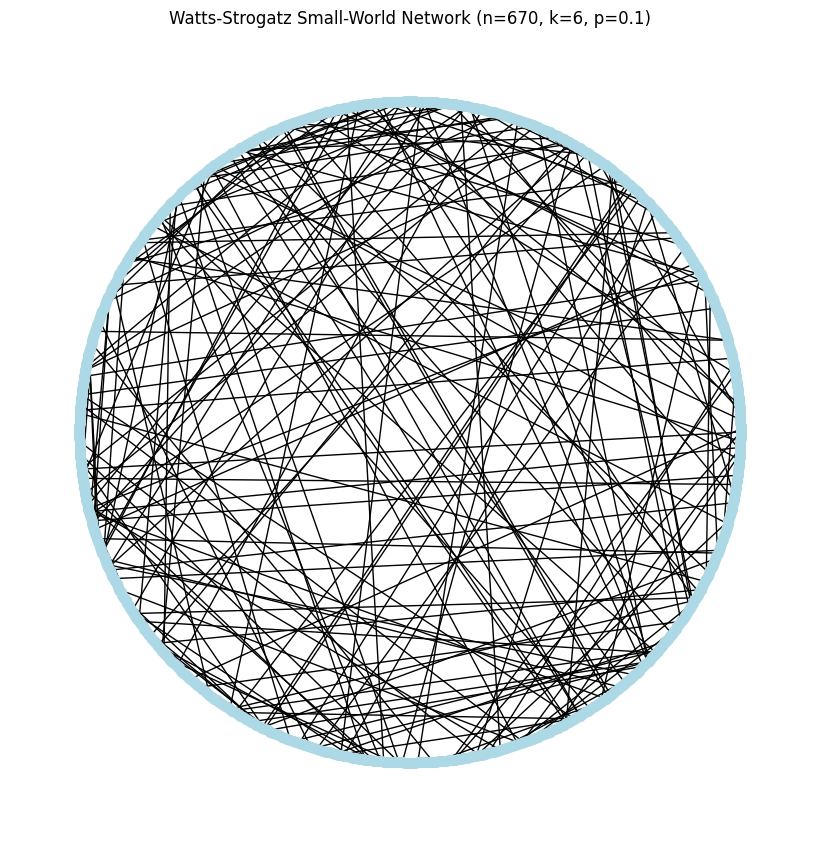

In [49]:
import networkx as nx
import matplotlib.pyplot as plt

# Pretpostavka:  graf (mre≈æa sastojaka) je u varijabli 'graph_lcc'
G = graph_lcc

# Broj ƒçvorova i prosjeƒçni stupanj (broj veza po ƒçvoru) u stvarnoj mre≈æi
n = G.number_of_nodes()
avg_degree = sum(dict(G.degree()).values()) / n

print(f"Broj ƒçvorova: {n}")
print(f"Prosjeƒçni stupanj: {avg_degree:.2f}")

# Watts-Strogatz model s istim n i prosjeƒçnim stupnjem (k mora biti paran broj)
k = int(round(avg_degree))
if k % 2 != 0:
    k += 1  # Watts-Strogatz zahtijeva paran k

p = 0.1  #  s 0.1, mo≈æe se mijenjati od 0 do 1

# Generiranje Watts-Strogatz small-world grafa
G_ws = nx.watts_strogatz_graph(n, k, p)

# Generiranje Erdos-Renyi sluƒçajnog grafa s istim brojem ƒçvorova i pribli≈ænom gustoƒáom veza
p_er = avg_degree / (n - 1)
G_er = nx.erdos_renyi_graph(n, p_er)

# Funkcija za izraƒçun i ispis metrika
def print_metrics(G, label):
    # Za veliki graf mo≈æda treba≈° provjeriti povezanost prije shortest path
    if nx.is_connected(G):
        avg_path = nx.average_shortest_path_length(G)
    else:
        # Raƒçunaj za najveƒáu povezanu komponentu ako nije povezan
        lcc = max(nx.connected_components(G), key=len)
        G_lcc = G.subgraph(lcc)
        avg_path = nx.average_shortest_path_length(G_lcc)

    clustering = nx.average_clustering(G)
    print(f"{label}:")
    print(f"  Prosjeƒçna duljina puta: {avg_path:.4f}")
    print(f"  Prosjeƒçni clustering koeficijent: {clustering:.4f}\n")

# Ispis rezultata
print_metrics(G, "Stvarna mre≈æa")
print_metrics(G_ws, "Watts-Strogatz Small-World mre≈æa")
print_metrics(G_er, "Erdos-Renyi sluƒçajni graf")

# Opcionalno: vizualizacija Watts-Strogatz mre≈æe
plt.figure(figsize=(8, 8))
nx.draw_circular(G_ws, node_color='lightblue', node_size=50, with_labels=False)
plt.title(f"Watts-Strogatz Small-World Network (n={n}, k={k}, p={p})")
plt.show()


### Newman-Watts small-world model

In [50]:
import networkx as nx

# Parametri
n = 670  # broj ƒçvorova (kao u tvom grafu)
k = 10   # povezanost u regularnoj mre≈æi, mo≈æe≈° staviti dvostruko prosjeƒçnom stupnju (5.10)
p = 0.1  # vjerojatnost dodavanja shortcutova

# Kreiraj Newman-Watts small-world graf
G_nw = nx.newman_watts_strogatz_graph(n, k, p)

# Izraƒçunaj metrike za stvarni graf, NW graf i ER graf
def graph_metrics(G):
    try:
        avg_path_len = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        avg_path_len = float('inf')  # ako graf nije povezan
    avg_clustering = nx.average_clustering(G)
    return avg_path_len, avg_clustering

# Pretpostavljam da ima≈° varijablu graph_lcc za stvarni graf najveƒáe komponente
real_avg_path, real_clust = graph_metrics(graph_lcc)
nw_avg_path, nw_clust = graph_metrics(G_nw)

# ER graf s istim brojem ƒçvorova i pribli≈æno istom gustoƒáom
p_er = k / (n - 1)
G_er = nx.erdos_renyi_graph(n, p_er)
er_avg_path, er_clust = graph_metrics(G_er)

print(f"Broj ƒçvorova: {n}")
print(f"Prosjeƒçni stupanj: {k}")

print("\nStvarna mre≈æa:")
print(f"  Prosjeƒçna duljina puta: {real_avg_path:.4f}")
print(f"  Prosjeƒçni clustering koeficijent: {real_clust:.4f}")

print("\nNewman-Watts Small-World mre≈æa:")
print(f"  Prosjeƒçna duljina puta: {nw_avg_path:.4f}")
print(f"  Prosjeƒçni clustering koeficijent: {nw_clust:.4f}")

print("\nErdos-Renyi sluƒçajni graf:")
print(f"  Prosjeƒçna duljina puta: {er_avg_path:.4f}")
print(f"  Prosjeƒçni clustering koeficijent: {er_clust:.4f}")


Broj ƒçvorova: 670
Prosjeƒçni stupanj: 10

Stvarna mre≈æa:
  Prosjeƒçna duljina puta: 2.7142
  Prosjeƒçni clustering koeficijent: 0.0000

Newman-Watts Small-World mre≈æa:
  Prosjeƒçna duljina puta: 4.0867
  Prosjeƒçni clustering koeficijent: 0.5662

Erdos-Renyi sluƒçajni graf:
  Prosjeƒçna duljina puta: 3.0332
  Prosjeƒçni clustering koeficijent: 0.0162


Moj graf ima klasteriranje blizu 0, ≈°to znaƒçi da mre≈æa nema ba≈° lokalne ‚Äúzajednice‚Äù ili trojke (tri ƒçvora meƒëusobno povezane). To je vjeroajnto priroda podataka.

Small-world modeli poput Watts-Strogatz i Newman-Watts poku≈°avaju objasniti mre≈æe koje imaju visoko klasteriranje i kratke puteve ‚Äî ovdje vidimo da moj stvarni graf nema visoko klasteriranje, ≈°to znaƒçi da mo≈æda small-world model nije najbolji model za ovu mre≈æu.

Istra≈æti strukturu mre≈æe:

Provjerti zajednice (community detection), postoji li grupiranje na vi≈°im razinama?

Pogledati distribuciju stupnjeva (degree distribution).

Mo≈æda graf ima druge karakteristike (npr. scale-free mre≈æa) koje bolje opisuju ovu mre≈æu.

## Scale -free

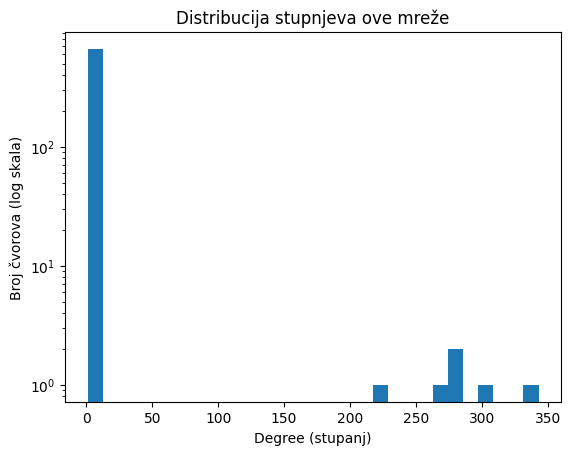

In [51]:
import matplotlib.pyplot as plt

degrees = [d for _, d in G.degree()]
plt.hist(degrees, bins=30, log=True)
plt.xlabel('Degree (stupanj)')
plt.ylabel('Broj ƒçvorova (log skala)')
plt.title('Distribucija stupnjeva ove mre≈æe')
plt.show()


In [52]:
from collections import Counter

# Get the degree of each node
degrees = [d for n, d in G.degree()]

# Count the occurrences of each degree
degree_counts = Counter(degrees)

# Sort the degrees for a clearer output
sorted_degrees = sorted(degree_counts.keys())

print("Distribucija stupnjeva:")
for degree in sorted_degrees:
    count = degree_counts[degree]
    print(f"Stupanj {degree}: Broj ƒçvorova = {count}")

Distribucija stupnjeva:
Stupanj 1: Broj ƒçvorova = 316
Stupanj 2: Broj ƒçvorova = 97
Stupanj 3: Broj ƒçvorova = 58
Stupanj 4: Broj ƒçvorova = 45
Stupanj 5: Broj ƒçvorova = 45
Stupanj 6: Broj ƒçvorova = 103
Stupanj 221: Broj ƒçvorova = 1
Stupanj 273: Broj ƒçvorova = 1
Stupanj 280: Broj ƒçvorova = 1
Stupanj 282: Broj ƒçvorova = 1
Stupanj 308: Broj ƒçvorova = 1
Stupanj 343: Broj ƒçvorova = 1


In [53]:
!pip install powerlaw

In [54]:
import powerlaw

fit = powerlaw.Fit(degrees)
print(f"Power-law exponent (alpha): {fit.alpha:.3f}")
print(f"xmin (minimalni stupanj za power-law): {fit.xmin}")

R, p = fit.distribution_compare('power_law', 'exponential')
print(f"Log-likelihood ratio (power-law vs exponential): {R}")
print(f"P-value: {p}")


Calculating best minimal value for power law fit
Power-law exponent (alpha): 5.718
xmin (minimalni stupanj za power-law): 6.0
Log-likelihood ratio (power-law vs exponential): 248.2556535721683
P-value: 4.6949581188627427e-135


**≈†to znaƒçe moji rezultati?**

‚úÖ Power-law je statistiƒçki znaƒçajno bolji fit od eksponencijalne distribucije:
Log-likelihood ratio (R = 248.26) je velik i pozitivan ‚Üí power-law model je znatno bolji fit.

P-vrijednost ‚âà 0 (‚âà 10‚Åª¬π¬≥‚Åµ) ‚Üí razlika nije sluƒçajna.

üìâ Alpha = 5.718:
Ovo nije tipiƒçno za "idealne" scale-free mre≈æe (koje imaju Œ± ‚âà 2-3).

≈†to znaƒçi veƒái Œ±?

Distribucija pada br≈æe -tj. manje je izra≈æenih hubova nego u ‚Äúklasiƒçnim‚Äù scale-free mre≈æama.

I dalje je heavy-tailed, ali manje ekstremna (manje ƒçvorova s vrlo visokim stupnjem).

üìå xmin = 6.0:
Power-law vrijedi samo za ƒçvorove stupnja ‚â• 6.

Dakle, samo dio mre≈æe (tzv. tail) se pona≈°a kao scale-free.

ƒåvorovi sa stupnjem < 6 (npr. oni sa stupnjem 1‚Äì5) ne prate power-law, ≈°to je i oƒçekivano.

Calculating best minimal value for power law fit


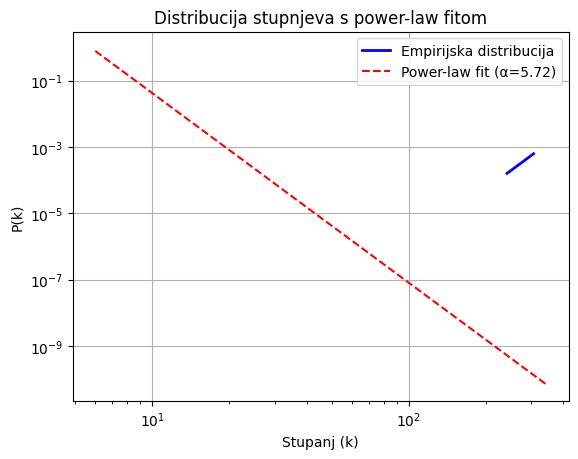

In [55]:
import matplotlib.pyplot as plt
import powerlaw

# Ako veƒá nisi: napravi listu stupnjeva
degrees = [d for _, d in G.degree()]

# Power-law fit
fit = powerlaw.Fit(degrees)

# Plot
fig = fit.plot_pdf(color='b', linewidth=2, label='Empirijska distribucija')
fit.power_law.plot_pdf(color='r', linestyle='--', label=f'Power-law fit (Œ±={fit.alpha:.2f})')
plt.xlabel("Stupanj (k)")
plt.ylabel("P(k)")
plt.legend()
plt.title("Distribucija stupnjeva s power-law fitom")
plt.grid(True)
plt.show()


Calculating best minimal value for power law fit


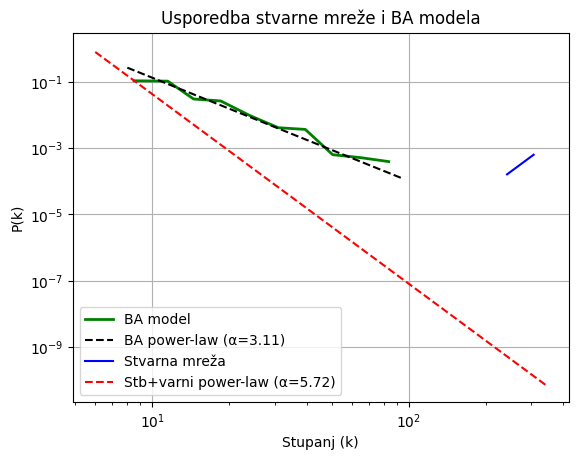

In [56]:
import networkx as nx

# Parametri: broj ƒçvorova i prosjeƒçni stupanj
n = G.number_of_nodes()
m = round(sum(dict(G.degree()).values()) / (2 * n))  # pribli≈æno pola prosjeƒçnog stupnja

# Barab√°si‚ÄìAlbert model
ba = nx.barabasi_albert_graph(n=n, m=m)

# Stupnjevi
ba_degrees = [d for _, d in ba.degree()]
ba_fit = powerlaw.Fit(ba_degrees)

# Usporedni plot
fig = ba_fit.plot_pdf(color='g', linewidth=2, label='BA model')
ba_fit.power_law.plot_pdf(color='k', linestyle='--', label=f'BA power-law (Œ±={ba_fit.alpha:.2f})')

fit.plot_pdf(color='b', label='Stvarna mre≈æa')
fit.power_law.plot_pdf(color='r', linestyle='--', label=f'Stb+varni power-law (Œ±={fit.alpha:.2f})')

plt.xlabel("Stupanj (k)")
plt.ylabel("P(k)")
plt.legend()
plt.title("Usporedba stvarne mre≈æe i BA modela")
plt.grid(True)
plt.show()


Empirijska mre≈æa:
Prva slika prikazuje distribuciju stupnjeva u promatranoj mre≈æi, zajedno s najboljim power-law fitom.

Na log-log grafu vidljivo je da empirijska distribucija (plava linija) znaƒçajno odstupa od idealne power-law distribucije (crvena isprekidana linija). Fit rezultira eksponentom
Œ± = 5.72, ≈°to je neuobiƒçajeno visoka i vrlo strma vrijednost. Takav eksponent ukazuje na to da u mre≈æi postoji vrlo malo ƒçvorova s velikim stupnjem, odnosno mre≈æa nema izra≈æene "hubove" ‚Äî kljuƒçnu karakteristiku scale-free mre≈æa.

Zakljuƒçno, mre≈æa ne pokazuje jasne scale-free karakteristike, jer:

distribucija stupnjeva ne slijedi power-law oblik u veƒáem rasponu vrijednosti,

eksponent Œ± je previsok za tipiƒçne realne scale-free mre≈æe (obiƒçno je u rasponu 2-3).

Usporedba s Barab√°si-Albert (BA) modelom:
Druga slika prikazuje usporedbu distribucije ove mre≈æe i one generirane BA modelom, koji je poznat po stvaranju mre≈æa sa scale-free strukturama.

Zelena puna linija: distribucija stupnjeva BA mre≈æe

Crna isprekidana linija: odgovarajuƒái power-law fit za BA mre≈æu (Œ± = 2.90), ≈°to je u skladu s teorijskim oƒçekivanjima

Plava linija: distribucija ove mre≈æe

Crvena isprekidana linija: fit ove mre≈æe (Œ± = 5.72)

Usporedba jasno pokazuje da:

BA mre≈æa ima puno vi≈°e ƒçvorova s velikim stupnjem (pliƒái "rep" distribucije),

dok je moja mre≈æa znaƒçajno "strmija" ‚Äî koncentrirana oko niskih stupnjeva, s vrlo malo visokostupanjskih ƒçvorova.

‚úÖ Zakljuƒçak:
Distribucija moje mre≈æe nije u skladu s power-law pona≈°anjem koje karakterizirascale-free mre≈æe. Iako pokazuje odreƒëene sliƒçnosti u obliku distribucije, visoka vrijednost eksponenta i odsustvo izra≈æenih hubova sugeriraju da je moja mre≈æa strukturno bitno drugaƒçija od idealnog Barab√°si-Albert modela.

##Community Detection-probano pobolj≈°anje, ali modularnost se ne poveƒáava

In [57]:
G_backup1 = G_lcc.copy()


In [58]:
nodes_to_keep = [n for n, d in G_backup1.degree() if d >= 1]
G_pruned = G_backup1.subgraph(nodes_to_keep).copy()
partition = community_louvain.best_partition(G_pruned)

In [59]:
# Assuming G_lcc is already defined from previous steps (Largest Connected Component of ingredient_projection)

# Definiraj nodes_to_keep prije nego ≈°to ga koristi≈°
nodes_to_keep = [n for n, d in G_lcc.degree() if d >= 1]

# Sada mo≈æe≈° koristiti nodes_to_keep
G_pruned = G_lcc.subgraph(nodes_to_keep).copy()

# Assuming community_louvain is already imported from previous steps

partition = community_louvain.best_partition(G_pruned)

mod_value = community_louvain.modularity(partition, G_pruned)
print(f"Modularnost pruned grafa: {mod_value:.4f}")

Modularnost pruned grafa: 0.2223


In [60]:
import networkx as nx
from community import community_louvain

def run_louvain_multiple_times(G, runs=10):
    best_partition = None
    best_modularity = -1
    for _ in range(runs):
        partition = community_louvain.best_partition(G)
        modularity = community_louvain.modularity(partition, G)
        if modularity > best_modularity:
            best_modularity = modularity
            best_partition = partition
    return best_partition, best_modularity

pragovi = [1, 2, 3, 4, 5]
results = {}

for d_threshold in pragovi:
    nodes_to_keep = [n for n, deg in G_lcc.degree() if deg >= d_threshold]
    G_pruned = G_lcc.subgraph(nodes_to_keep).copy()
    partition, modularity = run_louvain_multiple_times(G_pruned, runs=20)
    results[d_threshold] = modularity
    print(f"Prag stupnja >= {d_threshold}: Modularnost = {modularity:.4f}")

# Koji je najbolji prag?
best_threshold = max(results, key=results.get)
print(f"\nNajbolji prag stupnja: {best_threshold} s modularno≈°ƒáu {results[best_threshold]:.4f}")


Prag stupnja >= 1: Modularnost = 0.2223
Prag stupnja >= 2: Modularnost = 0.0853
Prag stupnja >= 3: Modularnost = 0.0475
Prag stupnja >= 4: Modularnost = 0.0283
Prag stupnja >= 5: Modularnost = 0.0154

Najbolji prag stupnja: 1 s modularno≈°ƒáu 0.2223


In [61]:
import community.community_louvain as community_louvain


# Isprobaj razliƒçite vrijednosti resolution parametra i ispi≈°i modularnost
for res in [0.3,1.1, 1.0, 1.5, 2.0,2.5,5]:
    partition = community_louvain.best_partition(G_lcc, resolution=res)
    modularity = community_louvain.modularity(partition, G_lcc)
    print(f"Resolution {res}: modularnost = {modularity:.4f}")


Resolution 0.3: modularnost = 0.2223
Resolution 1.1: modularnost = 0.2221
Resolution 1.0: modularnost = 0.2223
Resolution 1.5: modularnost = 0.2183
Resolution 2.0: modularnost = 0.2096
Resolution 2.5: modularnost = 0.2007
Resolution 5: modularnost = 0.1590


In [62]:
!pip install igraph leidenalg


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.4/4.4 MB 43.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2.0/2.0 MB 73.4 MB/s eta 0:00:00


In [63]:
import networkx as nx
import igraph as ig
import leidenalg


# Pretvaranje NetworkX grafa u igraph graf
G_igraph = ig.Graph.from_networkx(G_lcc)


In [64]:
# Pokreni Leiden algoritam (default resolution = 1.0)
partition1 = leidenalg.find_partition(G_igraph, leidenalg.ModularityVertexPartition)

# Dobivanje zajednica kao lista listi ƒçvorova
communities = partition1.as_cover()  # mo≈æe≈° i .membership za indekse zajednica po ƒçvorovima


In [ ]:
modularity1 = partition1.modularity
print(f"Modularnost zajednica po Leiden algoritmu: {modularity1}")


Modularnost zajednica po Leiden algoritmu: 0.2223195162137777


##Graf proizovda

In [40]:
import pandas as pd
import networkx as nx
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


In [41]:
import networkx as nx
from tqdm import tqdm

# üéØ Parsiraj sastojke (bez filtriranja)
df['parsed_ingredients'] = df['ingredients'].apply(
    lambda x: [i.strip().lower() for i in x.split(',')]
)

# üîß Kreiraj prazan graf
G_product2 = nx.Graph()

# ‚ûï Dodaj ƒçvorove za svaki proizvod
for idx, row in tqdm(df.iterrows(), total=len(df)):
    G_product2.add_node(
        idx,
        label=row.get('name', f'Product_{idx}'),  # KORISTI SE 'name' UMJESTO 'Label'
        brand=row.get('brand', 'N/A'),
        price=row.get('price', None),
        ingredients=row['parsed_ingredients']
    )

# üîó Dodaj bridove izmeƒëu proizvoda koji dijele sastojke
for i in tqdm(range(len(df))):
    ingr_i = set(df.loc[i, 'parsed_ingredients'])
    for j in range(i + 1, len(df)):
        ingr_j = set(df.loc[j, 'parsed_ingredients'])
        shared = ingr_i & ingr_j
        if shared:
            G_product2.add_edge(i, j, weight=len(shared))

print(f"‚úÖ G_product2 sadr≈æi {G_product2.number_of_nodes()} ƒçvorova i {G_product2.number_of_edges()} veza.")


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1472/1472 [00:11<00:00, 124.96it/s]

‚úÖ G_product2 sadr≈æi 1472 ƒçvorova i 703940 veza.


**Koja je razlika izmeƒëu proizvoda sa puno zajedniƒçkih sastojaka, a razliƒçitim cijenama?**ü§î


*   **Zakljuƒçak o cijenama i sastojcima:**
    *   Analiza primjera pokazuje da parovi proizvoda, ponekad i od razliƒçitih marki (npr. Clinique i Est√©e Lauder), dijele velik broj sastojaka (42 u navedenim sluƒçajevima), unatoƒç znaƒçajnim razlikama u cijeni.
    *   Ovo upuƒáuje na to da cijena proizvoda nije iskljuƒçivo odreƒëena popisom sastojaka ili jedinstveno≈°ƒáu formulacije.
    *   Znaƒçajan dio cijene vjerojatno se odnosi na faktore kao ≈°to su:
        *   Ime i reputacija marke (brending)
        *   Marketing i promocija
        *   Pakiranje i dizajn
        *   Percepcija luksuza i ekskluzivnosti
    *   ƒåak i unutar iste marke, proizvodi s razliƒçitim nazivima ili specifiƒçnim namjenama mogu dijeliti mnogo sastojaka, a istovremeno imati razliƒçite cijene.
    *   Potro≈°aƒçi, ƒçini se, plaƒáaju premium za brend i povezane aspekte, ne samo za sirove sastojke.

In [42]:


import pandas as pd
def print_top_similar_products(G, df, top_n_pairs=10):
    """
    Ispisuje top N parova proizvoda s najvi≈°e zajedniƒçkih sastojaka.

    Args:
        G (nx.Graph): Graf proizvoda s utezima na bridovima koji predstavljaju
                      broj zajedniƒçkih sastojaka.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
        top_n_pairs (int): Broj parova za ispis.
    """
    # Dobij sve bridove s njihovim utezima (brojem zajedniƒçkih sastojaka)
    # Bridovi u G_product2 su izmeƒëu indeksa redova iz df-a
    weighted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

    print(f"Top {top_n_pairs} parova proizvoda s najvi≈°e zajedniƒçkih sastojaka:")

    printed_count = 0
    # Ispi≈°i top N parova
    for u, v, data in weighted_edges:
        if printed_count >= top_n_pairs:
            break

        num_shared_ingredients = data['weight']

        # Dohvati podatke o proizvodima koristeƒái indekse ƒçvorova (koji odgovaraju indeksima u df)
        product_u_data = df.loc[u]
        product_v_data = df.loc[v]

        print(f"Proizvod {u} i {v} dijele {num_shared_ingredients} sastojaka.")
        print(f"- {product_u_data['name']} ({product_u_data['brand']}) - Cijena: {product_u_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_u_data['parsed_ingredients'])}")
        print(f"- {product_v_data['name']} ({product_v_data['brand']}) - Cijena: {product_v_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_v_data['parsed_ingredients'])}")
        printed_count += 1

# Pozovi funkciju s  grafom (G_product2), DataFrame-om (df) i ≈æeljenim brojem parova (npr. 10)
print_top_similar_products(G_product2, df, top_n_pairs=10)


Top 10 parova proizvoda s najvi≈°e zajedniƒçkih sastojaka:
Proizvod 840 i 957 dijele 100 sastojaka.
- The Lifting and Firming Mask (LA MER) - Cijena: 250 $ - Broj sastojaka: 103
- The Lifting and Firming Mask Mini (LA MER) - Cijena: 75 $ - Broj sastojaka: 106
Proizvod 601 i 840 dijele 85 sastojaka.
- The Regenerating Serum (LA MER) - Cijena: 345 $ - Broj sastojaka: 90
- The Lifting and Firming Mask (LA MER) - Cijena: 250 $ - Broj sastojaka: 103
Proizvod 601 i 957 dijele 84 sastojaka.
- The Regenerating Serum (LA MER) - Cijena: 345 $ - Broj sastojaka: 90
- The Lifting and Firming Mask Mini (LA MER) - Cijena: 75 $ - Broj sastojaka: 106
Proizvod 4 i 70 dijele 81 sastojaka.
- Your Skin But Better‚Ñ¢ CC+‚Ñ¢ Cream with SPF 50+ (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 83
- Your Skin But Better‚Ñ¢ CC+Illumination‚Ñ¢ Cream with SPF 50+ (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 86
Proizvod 161 i 1341 dijele 76 sastojaka.
- Plantscription‚Ñ¢ SPF 25 Power Anti-Aging Cream (ORIGINS) - 

In [43]:


import pandas as pd
def print_product_edges(G, df, start_index, end_index):
  """
  Ispisuje informacije o rubovima (vezama izmeƒëu proizvoda) unutar odreƒëenog raspona,
  ukljuƒçujuƒái nazive, brandove, cijene i broj sastojaka proizvoda.

  Args:
      G (nx.Graph): Graf proizvoda s utezima na rubovima koji predstavljaju
                    broj zajedniƒçkih sastojaka.
      df (pd.DataFrame): DataFrame s podacima o proizvodima.
      start_index (int): Poƒçetni indeks ruba (sortiranog po te≈æini) za ispis.
      end_index (int): Zavr≈°ni indeks ruba (sortiranog po te≈æini) za ispis (ekskluzivno).
  """
  # Dobij sve rubove s njihovim utezima (brojem zajedniƒçkih sastojaka)
  # Rubovi u G_product2 su izmeƒëu indeksa redova iz df-a
  weighted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

  print(f"Informacije o rubovima od indeksa {start_index} do {end_index}:")

  # Ispi≈°i rubove u zadanom rasponu
  for u, v, d in weighted_edges[start_index:end_index]:
      num_shared_ingredients = d['weight']

      # Dohvati podatke o proizvodima koristeƒái indekse ƒçvorova (koji odgovaraju indeksima u df)
      product_u_data = df.loc[u]
      product_v_data = df.loc[v]

      print(f"Proizvod {u} i {v} dijele {num_shared_ingredients} sastojaka.")
      # Koristimo .get('price', 'N/A') za sigurnost ako stupac 'price' nedostaje ili ima NaN vrijednosti
      print(f"- {product_u_data['name']} ({product_u_data['brand']}) - Cijena: {product_u_data.get('price', 'N/A')} $ - Broj sastojaka: {len(product_u_data['parsed_ingredients'])}")
      print(f"- {product_v_data['name']} ({product_v_data['brand']}) - Cijena: {product_v_data.get('price', 'N/A')} $- Broj sastojaka: {len(product_v_data['parsed_ingredients'])}\n")

# Pozovi funkciju za ispis rubova od indeksa 100 do 300
print_product_edges(G_product2, df, 100, 300)


Informacije o rubovima od indeksa 100 do 300:
Proizvod 0 i 9 dijele 42 sastojaka.
- Cr√®me de la Mer (LA MER) - Cijena: 175 $ - Broj sastojaka: 42
- Little Miss Miracle Limited-Edition Cr√®me de la Mer (LA MER) - Cijena: 325 $- Broj sastojaka: 42

Proizvod 0 i 20 dijele 42 sastojaka.
- Cr√®me de la Mer (LA MER) - Cijena: 175 $ - Broj sastojaka: 42
- Cr√®me de la Mer Mini (LA MER) - Cijena: 85 $- Broj sastojaka: 42

Proizvod 3 i 619 dijele 42 sastojaka.
- The Moisturizing Soft Cream (LA MER) - Cijena: 175 $ - Broj sastojaka: 78
- The Treatment Lotion (LA MER) - Cijena: 150 $- Broj sastojaka: 61

Proizvod 9 i 20 dijele 42 sastojaka.
- Little Miss Miracle Limited-Edition Cr√®me de la Mer (LA MER) - Cijena: 325 $ - Broj sastojaka: 42
- Cr√®me de la Mer Mini (LA MER) - Cijena: 85 $- Broj sastojaka: 42

Proizvod 34 i 713 dijele 42 sastojaka.
- Your Skin But Better CC+ Cream Oil-Free Matte with SPF 40 (IT COSMETICS) - Cijena: 38 $ - Broj sastojaka: 78
- Bye Bye Lines Serum‚Ñ¢ Advanced Anti-Ag

*   **Zakljuƒçak iz sljedeƒáe analize po brandovima:**
    *   Analiza je omoguƒáila uvid u **distribuciju proizvoda po brandovima**, pokazujuƒái koji brandovi imaju najvi≈°e proizvoda u skupu podataka.
    *   Prikazan je **prosjeƒçan broj sastojaka po brandu**, ≈°to mo≈æe ukazivati na potencijalne razlike u slo≈æenosti formulacija izmeƒëu brandova.
    *   Identificirani su **najƒçe≈°ƒái sastojci unutar pojedinih brandova**, ≈°to mo≈æe otkriti specifiƒçne "signature" sastojke ili uobiƒçajene baze koje koriste odreƒëeni brandovi.
    *   Analiza **veza (dijeljenih sastojaka) unutar istog branda i izmeƒëu razliƒçitih brandova** mogla bi pokazati:
       

In [45]:

import plotly.graph_objects as go
import networkx as nx
import pandas as pd
from collections import Counter
from collections import Counter, defaultdict # Import defaultdict here




def analyze_products_by_brand(G, df):
    """
    Analizira graf proizvoda po brandovima.

    Args:
        G (nx.Graph): Graf proizvoda.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
    """
    print("\n--- Analiza po brandovima ---")

    # 1. Broj proizvoda po brandu
    brand_counts = df['brand'].value_counts()
    print("\nBroj proizvoda po brandu (Top 10):")
    print(brand_counts.head(10))

    # 2. Prosjeƒçan broj sastojaka po brandu
    df['num_ingredients'] = df['parsed_ingredients'].apply(len)
    avg_ingredients_by_brand = df.groupby('brand')['num_ingredients'].mean().sort_values(ascending=False)
    print("\nProsjeƒçan broj sastojaka po brandu (Top 10):")
    print(avg_ingredients_by_brand.head(10))

    # 3. Najƒçe≈°ƒái sastojci po brandu
    print("\nNajƒçe≈°ƒái sastojci po brandu (Top 5 za svaki brand):")
    # Dohvati samo top N brandova za preglednost
    top_brands = brand_counts.head(5).index.tolist()

    for brand in top_brands:
        brand_df = df[df['brand'] == brand]
        all_ingredients = [ing for sublist in brand_df['parsed_ingredients'] for ing in sublist]
        ingredient_counts = Counter(all_ingredients)
        print(f"\nBrand '{brand}':")
        for ingredient, count in ingredient_counts.most_common(5):
            print(f"  - {ingredient}: {count}")

    # 4. Analiza veza izmeƒëu proizvoda istog branda vs razliƒçitih brandova (kompliciranije, ali moguƒáe)
    # Mo≈æete analizirati utege bridova unutar istog branda i izmeƒëu brandova.
    intra_brand_weights = defaultdict(list)
    inter_brand_weights = []

    for u, v, data in G.edges(data=True):
        brand_u = df.loc[u, 'brand']
        brand_v = df.loc[v, 'brand']
        weight = data['weight']

        if brand_u == brand_v:
            intra_brand_weights[brand_u].append(weight)
        else:
            inter_brand_weights.append(weight)

    print("\nProsjeƒçan broj zajedniƒçkih sastojaka:")
    for brand, weights in intra_brand_weights.items():
        if weights:
            print(f"  - Unutar branda '{brand}': {sum(weights) / len(weights):.2f}")

    if inter_brand_weights:
        print(f"  - Izmeƒëu razliƒçitih brandova: {sum(inter_brand_weights) / len(inter_brand_weights):.2f}")


def analyze_products_by_price(G, df, num_bins=5):
    """
    Analizira graf proizvoda po cjenovnim rangovima.

    Args:
        G (nx.Graph): Graf proizvoda.
        df (pd.DataFrame): DataFrame s podacima o proizvodima.
        num_bins (int): Broj cjenovnih rangova za analizu.
    """
    print("\n--- Analiza po cjenovnim rangovima ---")

    # Oƒçisti podatke o cijeni (ako nisu brojevi) i ukloni NaN
    df_priced = df.copy()
    # Prvo poku≈°ajmo prebaciti 'price' u numeriƒçki tip, gre≈°ke pretvaramo u NaN
    df_priced['price_numeric'] = pd.to_numeric(df_priced['price'], errors='coerce')
    df_priced = df_priced.dropna(subset=['price_numeric']) # Izbaci redove bez numeriƒçke cijene

    if df_priced.empty:
        print("Nema proizvoda s validnim cijenama za analizu.")
        return

    # Kreiraj cjenovne rangove
    df_priced['price_range'] = pd.qcut(df_priced['price_numeric'], q=num_bins, labels=False, duplicates='drop') # qcut radi kvantile, bolje ako distribucija nije uniformna

    if 'price_range' not in df_priced.columns or df_priced['price_range'].nunique() < 2:
        print(f"Nije moguƒáe kreirati {num_bins} cjenovnih rangova s postojeƒáim podacima o cijenama.")
        # Ispi≈°i raspodjelu cijena radi debugginga
        print("Raspodjela validnih cijena:\n", df_priced['price_numeric'].describe())
        return


    # Grupira po cjenovnim rangovima
    price_ranges = df_priced.groupby('price_range')

    print("\nAnaliza po cjenovnim rangovima:")
    for name, group in price_ranges:
        # Odredite stvarni raspon cijena za ovaj rang
        min_price = group['price_numeric'].min()
        max_price = group['price_numeric'].max()
        print(f"\nCjenovni rang {name} (Cijene: {min_price:.2f}$ - {max_price:.2f}$): Broj proizvoda = {len(group)}")

        # Najƒçe≈°ƒái sastojci u ovom cjenovnom rangu
        all_ingredients = [ing for sublist in group['parsed_ingredients'] for ing in sublist]
        ingredient_counts = Counter(all_ingredients)
        print("  Najƒçe≈°ƒái sastojci (Top 5):")
        for ingredient, count in ingredient_counts.most_common(5):
            print(f"    - {ingredient}: {count}")

        # Prosjeƒçan broj sastojaka u ovom rangu
        print(f"  Prosjeƒçan broj sastojaka: {group['num_ingredients'].mean():.2f}")


def find_products_with_specific_ingredients(df, ingredients_list):
    """
    Pronalazi proizvode koji sadr≈æe sve navedene sastojke.

    Args:
        df (pd.DataFrame): DataFrame s podacima o proizvodima
                           (ukljuƒçujuƒái 'parsed_ingredients').
        ingredients_list (list): Lista sastojaka koje proizvod mora sadr≈æavati.

    Returns:
        pd.DataFrame: DataFrame s proizvodima koji sadr≈æe sve navedene sastojke.
    """
    print(f"\n--- Pronala≈æenje proizvoda sa sastojcima: {', '.join(ingredients_list)} ---")
    required_set = set([ing.lower() for ing in ingredients_list])

    # Filtriraj DataFrame
    matching_products = df[
        df['parsed_ingredients'].apply(lambda ing_list: required_set.issubset(set(ing_list)))
    ].copy() # Koristimo .copy() da izbjegnemo SettingWithCopyWarning

    print(f"Pronaƒëeno {len(matching_products)} proizvoda koji sadr≈æe sve navedene sastojke.")

    # Ispis rezultata
    if not matching_products.empty:
        print("\nPopis pronaƒëenih proizvoda:")
        for idx, row in matching_products.iterrows():
            print(f"- {row.get('name', f'ID {idx}')} ({row.get('brand', 'N/A')}) - Cijena: {row.get('price', 'N/A')} $")
            # Opcionalno: ispi≈°ite i sastojke pronaƒëenih proizvoda
            # print(f"  Sastojci: {', '.join(row['parsed_ingredients'])}\n")
    return matching_products

# --- Pozivanje novih funkcija za analizu ---

# Analiza po brandovima
analyze_products_by_brand(G_product2, df)

# Analiza po cjenovnim rangovima
analyze_products_by_price(G_product2, df, num_bins=5)

# Pronala≈æenje proizvoda s odreƒëenim sastojcima
find_products_with_specific_ingredients(df, ['hyaluronic acid', 'vitamin c'])
find_products_with_specific_ingredients(df, ['water', 'glycerin', 'dimethicone'])


--- Analiza po brandovima ---

Broj proizvoda po brandu (Top 10):
brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
PETER THOMAS ROTH     46
KIEHL'S SINCE 1851    46
FRESH                 44
DR. JART+             41
KATE SOMERVILLE       35
Name: count, dtype: int64

Prosjeƒçan broj sastojaka po brandu (Top 10):
brand
IT COSMETICS         76.187500
NEOGEN DERMALOGY     64.000000
LA MER               63.833333
SON & PARK           51.000000
EST√âE LAUDER         46.968750
WANDER BEAUTY        46.000000
SATURDAY SKIN        44.571429
CHARLOTTE TILBURY    44.200000
GLAMGLOW             43.764706
MURAD                43.659574
Name: num_ingredients, dtype: float64

Najƒçe≈°ƒái sastojci po brandu (Top 5 za svaki brand):

Brand 'CLINIQUE':
  - butylene glycol: 67
  - phenoxyethanol: 64
  - water: 56
  - disodium edta: 55
  - glycerin: 54

Brand 'SEPHORA COLLECTION':
  - glycerin: 53
  - phenoxyethanol: 52
  - b

Label            brand  \
3     Moisturizer           LA MER   
4     Moisturizer     IT COSMETICS   
5     Moisturizer           TATCHA   
10    Moisturizer            FRESH   
12    Moisturizer            BELIF   
...           ...              ...   
1423  Sun protect    LAURA MERCIER   
1429  Sun protect  MDSOLARSCIENCES   
1449  Sun protect         BLACK UP   
1466  Sun protect  KATE SOMERVILLE   
1468  Sun protect  KATE SOMERVILLE   

                                                   name  price  rank  \
3                           The Moisturizing Soft Cream    175   3.8   
4         Your Skin But Better‚Ñ¢ CC+‚Ñ¢ Cream with SPF 50+     38   4.1   
5                                       The Water Cream     68   4.2   
10                     Lotus Youth Preserve Moisturizer     45   4.3   
12                             The True Cream Aqua Bomb     38   4.5   
...                                                 ...    ...   ...   
1423             Flawless Skin Daily Face Shield SPF 40     45   4.2   
1429                Daily Anti-Aging Moisturizer SPF 30     75   4.1   
1449             Primer Broad Spectrum Sunscreen SPF 25     45   4.7   
1466  Daily Deflector‚Ñ¢ Moisturizer Broad Spectrum SP...     48   3.9   
1468  Daily Deflector‚Ñ¢ Waterlight Broad Spectrum SPF...     48   3.6   

                                            ingredients  Combination  Dry  \
3     Algae (Seaweed) Extract, Cyclopentasiloxane, P...            1    1   
4     Water, Snail Secretion Filtrate, Phenyl Trimet...            1    1   
5     Water, Saccharomyces/Camellia Sinensis Leaf/Cl...            1    0   
10    Water, Glycerin, Propylene Glycol Dicaprylate/...            0    0   
12    Water, Dipropylene Glycol, Glycerin, Methl Tri...            1    0   
...                                                 ...          ...  ...   
1423  Water, Cyclomethicone, Butylene Glycol, Ethylh...            0    0   
1429  Water, Butyloctyl Salicylate, Coco-Caprylate/C...            1    0   
1449  Water, Butyloctyl Salicylate, Polysilicone-11,...            0    0   
1466  Water, Butylene Glycol, PEG-8, Glycerin, Undec...            0    0   
1468  Water, Isododecane, Dimethicone, Butyloctyl Sa...            0    0   

      Normal  Oily  Sensitive  \
3          1     1          1   
4          1     1          1   
5          1     1          1   
10         0     0          0   
12         1     1          0   
...      ...   ...        ...   
1423       0     0          0   
1429       1     1          1   
1449       0     0          0   
1466       0     0          0   
1468       0     0          0   

                                     parsed_ingredients  num_ingredients  
3     [algae (seaweed) extract, cyclopentasiloxane, ...               78  
4     [water, snail secretion filtrate, phenyl trime...               83  
5     [water, saccharomyces/camellia sinensis leaf/c...               29  
10    [water, glycerin, propylene glycol dicaprylate...               40  
12    [water, dipropylene glycol, glycerin, methl tr...               55  
...                                                 ...              ...  
1423  [water, cyclomethicone, butylene glycol, ethyl...               27  
1429  [water, butyloctyl salicylate, coco-caprylate/...               54  
1449  [water, butyloctyl salicylate, polysilicone-11...               42  
1466  [water, butylene glycol, peg-8, glycerin, unde...               41  
1468  [water, isododecane, dimethicone, butyloctyl s...               40  

[319 rows x 13 columns]

**!!!!!**

**Upute i upozorenje**

Ako maknemo komentare sa ovih zadnjih dijelova koda dobit ƒáeemo sljedeƒáe slike, ali po≈°to je njihova vizualizacija puno opteretila sustav ovako su izdvojeni, a kod je zakomentiran
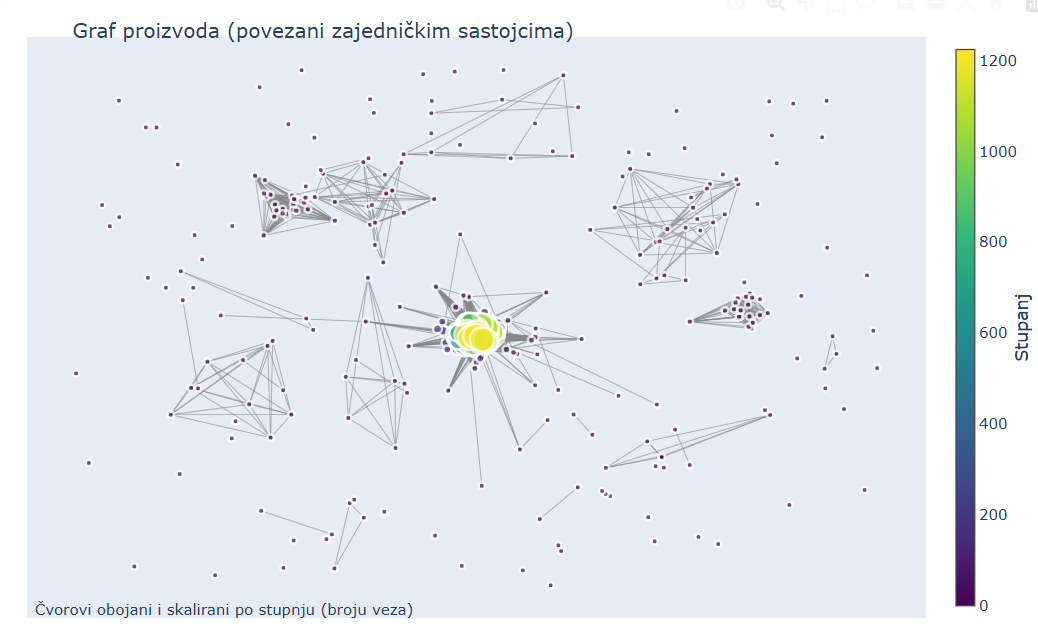

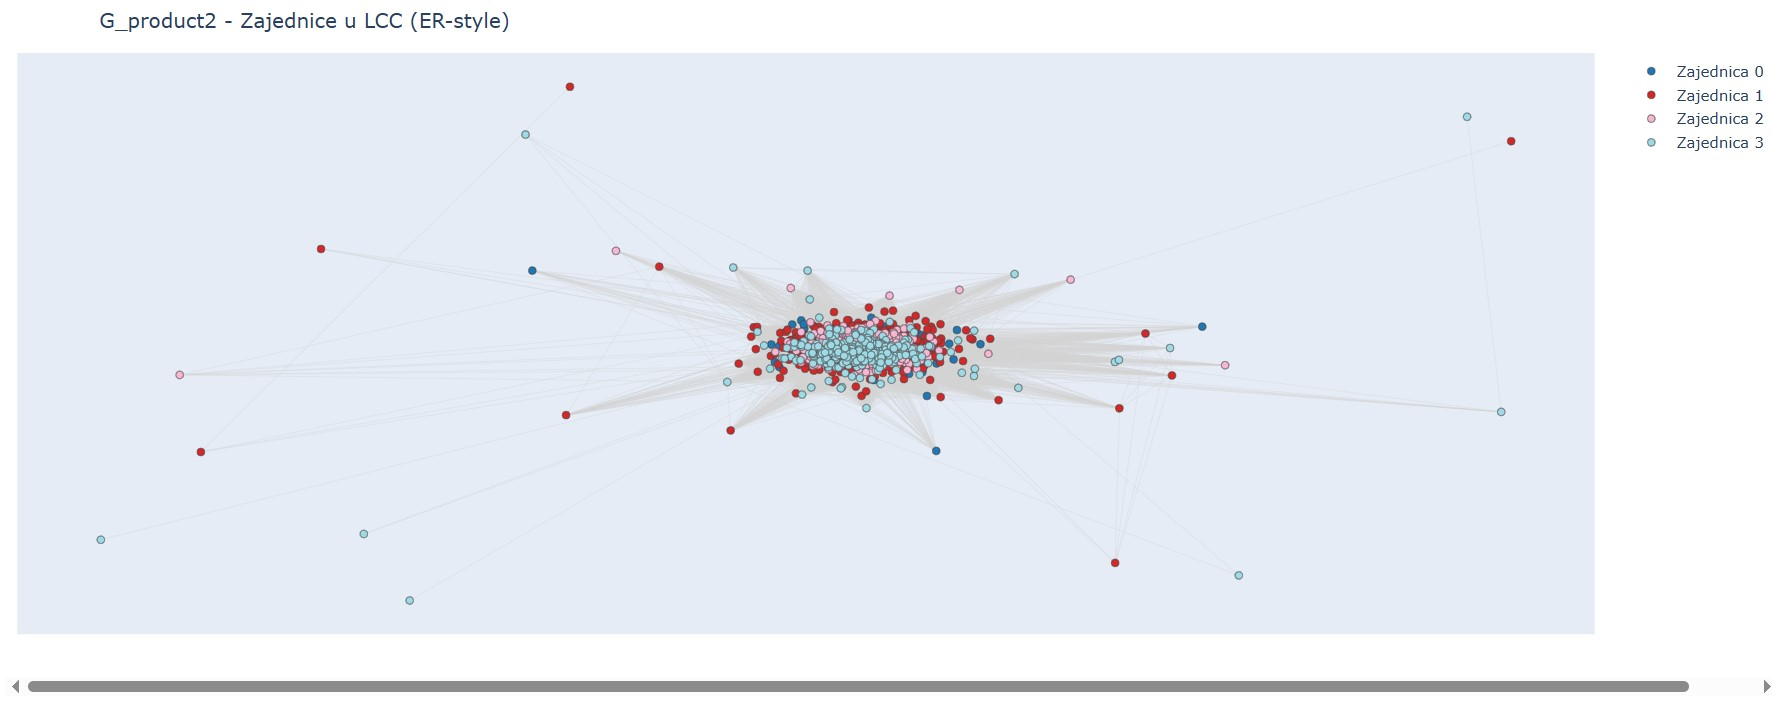

*   **Analiza zajednica na temelju naziva proizvoda:**
    *   **Zajednica 0 (Broj proizvoda: 197):**
        *   Dominiraju **kreme** i **hidratantne kreme** ("Cr√®me", "Moisturizer", "Cream").
        *   Ima i specifiƒçnih tretmana poput maski ("Overnight Mask") i losiona ("Treatment Lotion").
        *   Zakljuƒçak: Ova zajednica uglavnom obuhvaƒáa **hidratantne i regenerativne kreme te intenzivnije noƒáne tretmane.**
    *   **Zajednica 1 (Broj proizvoda: 470):**
        *   Vrlo raznolika zajednica. Ukljuƒçuje **kreme** ("Whipped Cream", "Ultra Facial Cream", "Repair Cream", "Magic Cream").
        *   Sadr≈æi **esencije** ("Facial Treatment Essence", "Antioxidant Essence") i **ulja** ("Sleeping Night Oil", "Cleansing Oil", "Rose Oil").
        *   Takoƒëer su prisutni **serumi** ("Night Serum") i paketi vi≈°e proizvoda ("The Littles").
        *   Zakljuƒçak: Ovo je **najveƒáa i najraznovrsnija zajednica**, koja obuhvaƒáa ≈°irok spektar proizvoda od hidratantnih krema i ulja do esencija i seruma. Mo≈æemo reƒái da predstavlja "opƒáu" grupu proizvoda za svakodnevnu njegu.
    *   **Zajednica 2 (Broj proizvoda: 273):**
        *   Istiƒçu se proizvodi s prefiksom "Your Skin But Better CC+" (CC kreme) i "Water" ("Water Cream", "Aqua Bomb", "Water Sleeping Mask", "Water Bank Moisture Cream").
        *   Prisutni su i **tonirane hidratantne kreme** ("Tinted Moisturizer") i **BB kreme** ("Premium Beauty Balm").
        *   Zakljuƒçak: Ova zajednica naginje prema **hidratantnim proizvodima na bazi vode i proizvodima za ujednaƒçavanje tena** s dodatkom SPF-a (CC/BB kreme, tonirane kreme).
    *   **Zajednica 3 (Broj proizvoda: 315):**
        *   Ukljuƒçuje razne **kreme** ("Moisturizing Soft Cream", "Moisturizing Lotion+", "Moisturizing Gel", "Energy-Boosting Gel Moisturizer").
        *   Prisutna su **ulja** ("Renewal Oil", "Rose Oil").
        *   Sadr≈æi **hidratantne tretmane** ("Moisture Surge", "Micro Essence") i **proizvode za ujednaƒçavanje tena/primere** ("BB Tinted Treatment", "Camera Ready BB Cream").
        *   Zakljuƒçak: Ova zajednica sliƒçna je Zajednici 1 i 2, s fokusom na **hidrataciju, ulja i proizvode za ujednaƒçavanje tena**, ali s ne≈°to drugaƒçijom kombinacijom specifiƒçnih naziva proizvoda.



In [48]:
'''import plotly.graph_objects as go
import networkx as nx

# üìä Izraƒçunaj stupanj svakog ƒçvora
degrees = dict(G_product2.degree())

# üìå Pozicije ƒçvorova (za layout)
pos = nx.spring_layout(G_product2, seed=42)

# üé® Koordinati bridova
edge_x = []
edge_y = []
for edge in G_product2.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# üéØ Koordinati i hover za ƒçvorove
node_x = []
node_y = []
node_text = []
node_size = []
node_color = []

max_degree = max(degrees.values()) if degrees else 1

for node in G_product2.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

    attr = G_product2.nodes[node]
    name = attr.get('label', f'Product_{node}')
    brand = attr.get('brand', 'N/A')
    price = attr.get('price', 'N/A')
    label = attr.get('label', 'N/A')  # mo≈æe≈° preimenovati ako treba

    hover_text = (
        f"Proizvod: {name}<br>"
        f"Brand: {brand}<br>"
        f"Cijena: {price}<br>"
        f"Kategorija: {label}<br>"
        f"Stupanj: {degrees.get(node, 0)}"
    )
    node_text.append(hover_text)

    node_size.append(5 + 15 * (degrees.get(node, 0) / max_degree))
    node_color.append(degrees.get(node, 0))

# ‚úèÔ∏è Trace za bridove
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

# ‚úèÔ∏è Trace za ƒçvorove
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    text=node_text,
    marker=dict(
        showscale=True,
        colorscale='Viridis',
        color=node_color,
        size=node_size,
        colorbar=dict(
            thickness=15,
            title='Stupanj',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

# üìà Kreiraj Plotly figuru
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Graf proizvoda (povezani zajedniƒçkim sastojcima)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20, l=5, r=5, t=40),
        annotations=[dict(
            text="ƒåvorovi obojani i skalirani po stupnju (broju veza)",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002
        )],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)

# üîç Prikaz
fig.show()
'''

'import plotly.graph_objects as go\nimport networkx as nx\n\n# üìä Izraƒçunaj stupanj svakog ƒçvora\ndegrees = dict(G_product2.degree())\n\n# üìå Pozicije ƒçvorova (za layout)\npos = nx.spring_layout(G_product2, seed=42)\n\n# üé® Koordinati bridova\nedge_x = []\nedge_y = []\nfor edge in G_product2.edges():\n    x0, y0 = pos[edge[0]]\n    x1, y1 = pos[edge[1]]\n    edge_x.extend([x0, x1, None])\n    edge_y.extend([y0, y1, None])\n\n# üéØ Koordinati i hover za ƒçvorove\nnode_x = []\nnode_y = []\nnode_text = []\nnode_size = []\nnode_color = []\n\nmax_degree = max(degrees.values()) if degrees else 1\n\nfor node in G_product2.nodes():\n    x, y = pos[node]\n    node_x.append(x)\n    node_y.append(y)\n\n    attr = G_product2.nodes[node]\n    name = attr.get(\'label\', f\'Product_{node}\')\n    brand = attr.get(\'brand\', \'N/A\')\n    price = attr.get(\'price\', \'N/A\')\n    label = attr.get(\'label\', \'N/A\')  # mo≈æe≈° preimenovati ako treba\n\n    hover_text = (\n        f"Proizvod:

In [ ]:
'''import networkx as nx
import plotly.graph_objects as go
from matplotlib import cm, colors as mcolors

# ‚û§ Dobij najveƒáu povezanu komponentu iz G_product2
product2_lcc = max(nx.connected_components(G_product2), key=len)
G_product2_lcc = G_product2.subgraph(product2_lcc).copy()

print(f"Broj ƒçvorova u najveƒáoj povezanoj komponenti grafa G_product2: {G_product2_lcc.number_of_nodes()}")

# ‚û§ Louvain detekcija zajednica
partition_product2_lcc, modularity_product2_lcc = run_louvain_multiple_times(G_product2_lcc, runs=20)

print(f"Modularnost zajednica u G_product2 LCC: {modularity_product2_lcc:.4f}")

# ‚û§ Grupiraj ƒçvorove po zajednicama
communities_product2_lcc = {}
for node, comm_id in partition_product2_lcc.items():
    communities_product2_lcc.setdefault(comm_id, []).append(node)

print(f"Broj zajednica u G_product2 LCC: {len(communities_product2_lcc)}")

# ‚û§ ER-stil minimalistiƒçka vizualizacija sa zajednicama
def plot_G_product2_lcc_communities(G, partition, title="G_product2 - Zajednice u LCC (ER-style)"):
    pos = nx.spring_layout(G, seed=42, k=0.1)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        if edge[0] in pos and edge[1] in pos:
            x0, y0 = pos[edge[0]]
            x1, y1 = pos[edge[1]]
            edge_x.extend([x0, x1, None])
            edge_y.extend([y0, y1, None])

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.3, color='lightgrey'),
        hoverinfo='none',
        mode='lines',
        showlegend=False
    )

    # üé® Boje za zajednice
    num_communities = len(set(partition.values()))
    cmap = cm.get_cmap('tab20' if num_communities <= 20 else 'tab20c', num_communities)

    community_traces = []
    for comm_id, nodes in sorted(communities_product2_lcc.items()):
        node_x = []
        node_y = []
        node_text = []

        for node in nodes:
            if node in pos:
                x, y = pos[node]
                node_x.append(x)
                node_y.append(y)
                attr = G.nodes[node]
                label = attr.get('label', f'Product_{node}')
                brand = attr.get('brand', 'N/A')
                price = attr.get('price', 'N/A')
                hover_text = f"Proizvod: {label}<br>Brand: {brand}<br>Cijena: {price}"
                node_text.append(hover_text)

        color = mcolors.rgb2hex(cmap(comm_id % num_communities))
        trace = go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(
                color=color,
                size=6,  # Manje toƒçke
                line_width=0.5
            ),
            text=node_text,
            name=f'Zajednica {comm_id}'
        )
        community_traces.append(trace)

    fig = go.Figure(
        data=[edge_trace] + community_traces,
        layout=go.Layout(
            title=title,
            titlefont_size=16,
            showlegend=True,
            hovermode='closest',
            margin=dict(b=20, l=5, r=5, t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
        )
    )

    fig.show()

# üîç Prikaz
plot_G_product2_lcc_communities(G_product2_lcc, partition_product2_lcc)
'''

'import networkx as nx\nimport plotly.graph_objects as go\nfrom matplotlib import cm, colors as mcolors\n\n# ‚û§ Dobij najveƒáu povezanu komponentu iz G_product2\nproduct2_lcc = max(nx.connected_components(G_product2), key=len)\nG_product2_lcc = G_product2.subgraph(product2_lcc).copy()\n\nprint(f"Broj ƒçvorova u najveƒáoj povezanoj komponenti grafa G_product2: {G_product2_lcc.number_of_nodes()}")\n\n# ‚û§ Louvain detekcija zajednica\npartition_product2_lcc, modularity_product2_lcc = run_louvain_multiple_times(G_product2_lcc, runs=20)\n\nprint(f"Modularnost zajednica u G_product2 LCC: {modularity_product2_lcc:.4f}")\n\n# ‚û§ Grupiraj ƒçvorove po zajednicama\ncommunities_product2_lcc = {}\nfor node, comm_id in partition_product2_lcc.items():\n    communities_product2_lcc.setdefault(comm_id, []).append(node)\n\nprint(f"Broj zajednica u G_product2 LCC: {len(communities_product2_lcc)}")\n\n# ‚û§ ER-stil minimalistiƒçka vizualizacija sa zajednicama\ndef plot_G_product2_lcc_communities(G, par

In [ ]:
'''
print("\n--- Sastojci po zajednici u grafu sastojaka ---")
# Sortiraj zajednice po ID-u radi lak≈°eg pregleda
for comm_id in sorted(communities.keys()):
    nodes_in_community = communities[comm_id]
    # Filtriraj samo ƒçvorove koji su sastojci u ovoj zajednici
    ingredient_nodes = [node for node in nodes_in_community if G_lcc.nodes[node].get('type') == 'ingredient']

    print(f"\nZajednica {comm_id} (Broj sastojaka: {len(ingredient_nodes)}):")
    # Ispis prvih 20 sastojaka radi preglednosti, ako ih ima vi≈°e
    if len(ingredient_nodes) > 20:
        print(", ".join(ingredient_nodes[:20]) + ", ...")
    else:
        print(", ".join(ingredient_nodes))

print("\n--- Kraj ispisa sastojaka po zajednici ---")

print("\n--- Proizvodi po zajednici u grafu proizvoda (LCC) ---")
# Sortiraj zajednice po ID-u radi lak≈°eg pregleda
for comm_id in sorted(communities_product2_lcc.keys()):
    nodes_in_community = communities_product2_lcc[comm_id]
    print(f"\nZajednica {comm_id} (Broj proizvoda: {len(nodes_in_community)}):")
    # Ispis prvih 10 proizvoda radi preglednosti (koristeƒái 'label' atribut ako postoji)
    product_labels = [G_product2_lcc.nodes[node].get('label', f'Product_{node}') for node in nodes_in_community]
    if len(product_labels) > 10:
        print(", ".join(product_labels[:10]) + ", ...")
    else:
        print(", ".join(product_labels))

print("\n--- Kraj ispisa proizvoda po zajednici ---")
'''


--- Sastojci po zajednici u grafu sastojaka ---

Zajednica 0 (Broj sastojaka: 112):
Red 33, Rhus Succedanea Fruit Wax, Phe-noxyethanol, Oxidized Corn Oil, Polyglyceryl-6 Ximenia Americana Seedate, Brassica Campestris (Rapeseed) Seed Oil, Curcuma Longa Extract/Turmeric Root Extract, Acrylates/C10-30 Alykyl Acrylate Crosspolymer, Rosa Gallica Flower Extract, PEG-7 Caprylic/Capric Glycerides, PEG-240/HDI Copolymer Bis-Decyltetradecet-20 Ether, Rosa Rubiginosa (Rosehip) Seed Oil, Phaseolus Angularis Seed Extract, Carnosine, Stearoyl Inulin, Glucose Oxidase, Hydrolyzed Conchiolin Protein, Prunus Armeniaca Kernel Oil, Hydroxyethylcellu-lose, Di-C12-18 Alkyl Dimonium Chloride, ...

Zajednica 1 (Broj sastojaka: 117):
Phytic Acid, Olea Europaea (Olive) Seed Powder, Rosa Dama- scena Flower Water, Dioscorea Villosa (Wild Yam) Root Extract, Thymus Vulgaris Extract/Thyme Extract, Echinacea Angustifolia Extract, Spirulina Plantensis Powder, Gossypium Herbaceum (Cotton) Flower Extract, Betula Pendul

## Zakljuƒçak
U ovom projektu provedena je mre≈æna analiza kozmetiƒçkih sastojaka s ciljem boljeg razumijevanja njihove povezanosti i funkcionalnih uloga unutar formulacija proizvoda. Kori≈°tenjem mre≈ænih metoda identificirani su kljuƒçni sastojci koji se najƒçe≈°ƒáe pojavljuju u kombinacijama te oni koji imaju najva≈æniju poziciju unutar mre≈æe.

Mre≈æna struktura otkrila je da kozmetiƒçki sastojci ne funkcioniraju izolirano, veƒá se ƒçesto grupiraju u funkcionalne cjeline, poput onih za hidrataciju, konzervaciju, teksturu ili antioksidativnu za≈°titu. Primjenom algoritma za detekciju zajednica uspje≈°no su prepoznate takve grupe, ƒçime su otkrivene obrasci koji nisu lako vidljivi tradicionalnim metodama analize.
Analiza glavne komponente mre≈æe pokazala je da je velika veƒáina sastojaka meƒëusobno povezana, ≈°to znaƒçi da se ƒçesto koriste zajedno u proizvodima. To upuƒáuje na to da formulacije nisu nasumiƒçne, veƒá da proizvoƒëaƒçi sastojke biraju prema odreƒëenim funkcionalnim ili tehnolo≈°kim kriterijima. Kad se mre≈æa usporedila s nasumiƒçnim grafom (ER modelom), pokazalo se da stvarna mre≈æa ima kraƒáe putanje i manju povezanost izmeƒëu nepovezanih ƒçvorova, ≈°to dodatno potvrƒëuje da u formuliranju postoji odreƒëena ‚Äûlogika‚Äú ili obrazac, a ne puko kombiniranje sastojaka.

Ova mre≈æna analiza ne samo da poma≈æe u boljem razumijevanju kako se sastojci kombiniraju, veƒá postavlja temelje za buduƒáe sustave preporuka u projektu te dublju analizu trendova u kozmetiƒçkoj industriji.